In [77]:
import pandas as pd
import re
import nltk
import spacy
from num2words import num2words
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import pos_tag
from spacy.pipeline import EntityRecognizer

In [78]:
#from google.colab import drive
#drive.mount('/content/drive')

In [79]:
# Read the JSON file into a DataFrame
#df = pd.read_json('/content/drive/MyDrive/Resume.json', lines=True)
df = pd.read_json('Resume.json', lines=True)

# Save the DataFrame to CSV
df.to_csv('dataframe.csv', index=None)

# Print the shape of the dataset
print(f"Shape of the dataset: {df.shape}")

# Display the first few rows of the DataFrame
df.head()

Shape of the dataset: (200, 2)


,content,annotation
0,Govardhana K\nSenior Software Engineer\n\nBeng...,"[{'label': ['Companies worked at'], 'points': ..."
1,"Harini Komaravelli\nTest Analyst at Oracle, Hy...","[{'label': ['Companies worked at'], 'points': ..."
2,Hartej Kathuria\nData Analyst Intern - Oracle ...,"[{'label': ['Skills'], 'points': [{'start': 22..."
3,Ijas Nizamuddin\nAssociate Consultant - State ...,"[{'label': ['Skills'], 'points': [{'start': 46..."
4,"Imgeeyaul Ansari\njava developer\n\nPune, Maha...","[{'label': ['Skills'], 'points': [{'start': 18..."


In [80]:
df['content'][0]

'Govardhana K\nSenior Software Engineer\n\nBengaluru, Karnataka, Karnataka - Email me on Indeed: indeed.com/r/Govardhana-K/\nb2de315d95905b68\n\nTotal IT experience 5 Years 6 Months\nCloud Lending Solutions INC 4 Month • Salesforce Developer\nOracle 5 Years 2 Month • Core Java Developer\nLanguages Core Java, Go Lang\nOracle PL-SQL programming,\nSales Force Developer with APEX.\n\nDesignations & Promotions\n\nWilling to relocate: Anywhere\n\nWORK EXPERIENCE\n\nSenior Software Engineer\n\nCloud Lending Solutions -  Bangalore, Karnataka -\n\nJanuary 2018 to Present\n\nPresent\n\nSenior Consultant\n\nOracle -  Bangalore, Karnataka -\n\nNovember 2016 to December 2017\n\nStaff Consultant\n\nOracle -  Bangalore, Karnataka -\n\nJanuary 2014 to October 2016\n\nAssociate Consultant\n\nOracle -  Bangalore, Karnataka -\n\nNovember 2012 to December 2013\n\nEDUCATION\n\nB.E in Computer Science Engineering\n\nAdithya Institute of Technology -  Tamil Nadu\n\nSeptember 2008 to June 2012\n\nhttps://www.

In [81]:
df['annotation'][0]

[{'label': ['Companies worked at'],
  'points': [{'start': 1749, 'end': 1754, 'text': 'Oracle'}]},
 {'label': ['Companies worked at'],
  'points': [{'start': 1696, 'end': 1701, 'text': 'Oracle'}]},
 {'label': ['Companies worked at'],
  'points': [{'start': 1417, 'end': 1422, 'text': 'Oracle'}]},
 {'label': ['Skills'],
  'points': [{'start': 1356,
    'end': 1792,
    'text': 'Languages: Core Java, Go Lang, Data Structures & Algorithms, Oracle\nPL-SQL programming, Sales Force with APEX.\nTools: RADTool, Jdeveloper, NetBeans, Eclipse, SQL developer,\nPL/SQL Developer, WinSCP, Putty\nWeb Technologies: JavaScript, XML, HTML, Webservice\n\nOperating Systems: Linux, Windows\nVersion control system SVN & Git-Hub\nDatabases: Oracle\nMiddleware: Web logic, OC4J\nProduct FLEXCUBE: Oracle FLEXCUBE Versions 10.x, 11.x and 12.x'}]},
 {'label': ['Companies worked at'],
  'points': [{'start': 1209, 'end': 1214, 'text': 'Oracle'}]},
 {'label': ['Skills'],
  'points': [{'start': 1136,
    'end': 1247,


## Data Cleaning

In [82]:
df.isnull().sum()

content       0
annotation    0
dtype: int64

### Text Cleaning

In [83]:
def clean_text(resume):
    # Convert the text to lowercase
    resume = resume.lower()

    # Remove newlines
    resume = re.sub("\n", ' ', resume)

    # Remove special characters
    resume = re.sub(r'[,•()➢❑]', ' ', resume)

    # Remove extra whitespaces, dashes, and dots
    resume = re.sub(r'\s\s+|\s-\s|\.\s', ' ', resume)

    # Tokenize the text into words
    tokenized_words = resume.split(" ")

    length = len(tokenized_words)

    # Convert digits to words
    for i in range(length):
        if tokenized_words[i].isdigit():
            tokenized_words[i] = num2words(tokenized_words[i])

    # Remove stopwords
    sw = set(stopwords.words('english'))
    tokens_without_sw = []
    for w in tokenized_words:
        if w not in sw:
            tokens_without_sw.append(w)

    # Join the tokens back into a string
    final_resume = " ".join(tokens_without_sw)
 
    return final_resume

### Clean content column

In [84]:
content_resumes = df['content']

for i in range(0,200):
    content_resumes[i] = clean_text(content_resumes[i])

In [85]:
df['content'][0]

'govardhana k senior software engineer bengaluru karnataka karnataka email indeed: indeed.com/r/govardhana-k/ b2de315d95905b68 total experience five years six months cloud lending solutions inc four month salesforce developer oracle five years two month core java developer languages core java go lang oracle pl-sql programming sales force developer apex  designations & promotions willing relocate: anywhere work experience senior software engineer cloud lending solutions  bangalore karnataka  january two thousand and eighteen present present senior consultant oracle  bangalore karnataka  november two thousand and sixteen december two thousand and seventeen staff consultant oracle  bangalore karnataka  january two thousand and fourteen october two thousand and sixteen associate consultant oracle  bangalore karnataka  november two thousand and twelve december two thousand and thirteen education b.e computer science engineering adithya institute technology  tamil nadu september two thousand

In [86]:
df['content'][1]

"harini komaravelli test analyst oracle hyderabad hyderabad telangana email indeed: indeed.com/r/harini- komaravelli/2659eee82e435d1b six yrs experience manual automation testing  work experience qa analyst oracle test analyst oracle hyderabad infosys ltd  hyderabad telangana  november two thousand and eleven february two thousand and sixteen hyderabad nov two thousand and eleven feb17 two thousand and sixteen worked tata consultancy services hyderabad feb twenty-four apr eleven two thousand and seventeen currently working test analyst oracle hyderabad qa analyst six years experience oracle education mca osmania university b.sc computer science osmania university skills functional testing blue prism qtp additional information area expertise: familiar agile methodologies  knowledge energy petroleum & health care domains  involved preparation test scenarios  preparing test data test cases  https://www.indeed.com/r/harini-komaravelli/2659eee82e435d1b?isid=rex-download&ikw=download-top&co=

### Word Analysis

In [87]:
# We use the Tf-Idf vectorizer to gain insights about the probabilities of all the possible words and collocations
# we can find in these resumes.

# Create an instance of the Tf-Idf vectorizer with a specified ngram range
vect = TfidfVectorizer(ngram_range=(1, 3))

# Apply the Tf-Idf vectorizer to the 'content_resumes' data
tf_idf = vect.fit_transform(content_resumes)

# Retrieve the terms (words and collocations) in the same order as they appear in the tf_idf matrix
terms = vect.get_feature_names_out()

# Print the tf_idf matrix
print(tf_idf)


  (0, 344)	0.0392661003166396
  (0, 272)	0.0392661003166396
  (0, 137)	0.0392661003166396
  (0, 118959)	0.0392661003166396
  (0, 43688)	0.0392661003166396
  (0, 74443)	0.0392661003166396
  (0, 43683)	0.0392661003166396
  (0, 82323)	0.0392661003166396
  (0, 72530)	0.0392661003166396
  (0, 62382)	0.0392661003166396
  (0, 120304)	0.0392661003166396
  (0, 67734)	0.0392661003166396
  (0, 74524)	0.0392661003166396
  (0, 28603)	0.0392661003166396
  (0, 50074)	0.0392661003166396
  (0, 46406)	0.0392661003166396
  (0, 105593)	0.0392661003166396
  (0, 106190)	0.0392661003166396
  (0, 24520)	0.0392661003166396
  (0, 118928)	0.036428206199717955
  (0, 121189)	0.036428206199717955
  (0, 61877)	0.036428206199717955
  (0, 106376)	0.03285288244566607
  (0, 73835)	0.02873890004625888
  (0, 120480)	0.0392661003166396
  :	:
  (199, 53218)	0.008534517639336575
  (199, 3294)	0.008942340037136233
  (199, 123414)	0.01204278283231081
  (199, 73208)	0.010115007446032302
  (199, 99480)	0.007442812760637008
  (19

In [88]:
terms


array(['000', '000 servers', '000 servers trouble', ..., 'zxf05u01',
       'zxf05u01 validating', 'zxf05u01 validating vendor'], dtype=object)

In [89]:
### Showing the part of speech that these terms belong to

nltk.pos_tag(terms)

[('000', 'CD'),
 ('000 servers', 'NNS'),
 ('000 servers trouble', 'CD'),
 ('000members', 'NNS'),
 ('000members evaluatedpatientcareneeds', 'CD'),
 ('000members evaluatedpatientcareneeds prioritizedtreatment', 'CD'),
 ('0023411a049a1441', 'CD'),
 ('0023411a049a1441 challenging', 'VBG'),
 ('0023411a049a1441 challenging career', 'CD'),
 ('0023411a049a1441 isid', 'CD'),
 ('0023411a049a1441 isid rex', 'CD'),
 ('005e1ab800b4cb42', 'CD'),
 ('005e1ab800b4cb42 isid', 'CD'),
 ('005e1ab800b4cb42 isid rex', 'CD'),
 ('005e1ab800b4cb42 work', 'CD'),
 ('005e1ab800b4cb42 work experience', 'CD'),
 ('00f125c7b9b95a35', 'CD'),
 ('00f125c7b9b95a35 isid', 'CD'),
 ('00f125c7b9b95a35 isid rex', 'CD'),
 ('00f125c7b9b95a35 two', 'CD'),
 ('00f125c7b9b95a35 two year', 'CD'),
 ('01', 'CD'),
 ('01 crm', 'CD'),
 ('01 crm 02', 'CD'),
 ('01 dopra', 'CD'),
 ('01 dopra description', 'CD'),
 ('01 ethernet', 'CD'),
 ('01 ethernet routing', 'VBG'),
 ('01 tnc', 'CD'),
 ('01 tnc controller', 'CD'),
 ('01st', 'CD'),
 ('01st 

In [90]:
### Displaying the features table, where columns are the possible mono-, bi- and tri-grams in all of the resumes.
### We try to identify the most common words and collocations to use in our NER model, later.

pd.DataFrame.sparse.from_spmatrix(tf_idf, index = content_resumes, columns=terms)[0:2]

000  000 servers  \
content                                                                
govardhana k senior software engineer bengaluru...  0.0          0.0   
harini komaravelli test analyst oracle hyderaba...  0.0          0.0   

                                                    000 servers trouble  \
content                                                                   
govardhana k senior software engineer bengaluru...                  0.0   
harini komaravelli test analyst oracle hyderaba...                  0.0   

                                                    000members  \
content                                                          
govardhana k senior software engineer bengaluru...         0.0   
harini komaravelli test analyst oracle hyderaba...         0.0   

                                                    000members evaluatedpatientcareneeds  \
content                                                                                    
govardhana k senior software engineer bengaluru...                                   0.0   
harini komaravelli test analyst oracle hyderaba...                                   0.0   

                                                    000members evaluatedpatientcareneeds prioritizedtreatment  \
content                                                                                                         
govardhana k senior software engineer bengaluru...                                                0.0           
harini komaravelli test analyst oracle hyderaba...                                                0.0           

                                                    0023411a049a1441  \
content                                                                
govardhana k senior software engineer bengaluru...               0.0   
harini komaravelli test analyst oracle hyderaba...               0.0   

                                                    0023411a049a1441 challenging  \
content                                                                            
govardhana k senior software engineer bengaluru...                           0.0   
harini komaravelli test analyst oracle hyderaba...                           0.0   

                                                    0023411a049a1441 challenging career  \
content                                                                                   
govardhana k senior software engineer bengaluru...                                  0.0   
harini komaravelli test analyst oracle hyderaba...                                  0.0   

                                                    0023411a049a1441 isid  \
content                                                                     
govardhana k senior software engineer bengaluru...                    0.0   
harini komaravelli test analyst oracle hyderaba...                    0.0   

                                                    ...  zoom  zoom knowledge  \
content                                             ...                         
govardhana k senior software engineer bengaluru...  ...   0.0             0.0   
harini komaravelli test analyst oracle hyderaba...  ...   0.0             0.0   

                                                    zoom knowledge webrtc  \
content                                                                     
govardhana k senior software engineer bengaluru...                    0.0   
harini komaravelli test analyst oracle hyderaba...                    0.0   

                                                    zoom supporting  \
content                                                               
govardhana k senior software engineer bengaluru...              0.0   
harini komaravelli test analyst oracle hyderaba...              0.0   

                                                    zoom supporting bada2  \
content                                                                     
go

In [91]:
### Final Clean Resume Sample

print(content_resumes[1])

harini komaravelli test analyst oracle hyderabad hyderabad telangana email indeed: indeed.com/r/harini- komaravelli/2659eee82e435d1b six yrs experience manual automation testing  work experience qa analyst oracle test analyst oracle hyderabad infosys ltd  hyderabad telangana  november two thousand and eleven february two thousand and sixteen hyderabad nov two thousand and eleven feb17 two thousand and sixteen worked tata consultancy services hyderabad feb twenty-four apr eleven two thousand and seventeen currently working test analyst oracle hyderabad qa analyst six years experience oracle education mca osmania university b.sc computer science osmania university skills functional testing blue prism qtp additional information area expertise: familiar agile methodologies  knowledge energy petroleum & health care domains  involved preparation test scenarios  preparing test data test cases  https://www.indeed.com/r/harini-komaravelli/2659eee82e435d1b?isid=rex-download&ikw=download-top&co=i

In [92]:
### NLTK with word tokenization results in seperating urls

tokenized_words = word_tokenize(content_resumes[1])

nltk.pos_tag(tokenized_words)

[('harini', 'NN'),
 ('komaravelli', 'JJ'),
 ('test', 'NN'),
 ('analyst', 'NN'),
 ('oracle', 'NN'),
 ('hyderabad', 'NN'),
 ('hyderabad', 'NN'),
 ('telangana', 'NN'),
 ('email', 'VBP'),
 ('indeed', 'RB'),
 (':', ':'),
 ('indeed.com/r/harini-', 'JJ'),
 ('komaravelli/2659eee82e435d1b', 'NN'),
 ('six', 'CD'),
 ('yrs', 'NN'),
 ('experience', 'NN'),
 ('manual', 'JJ'),
 ('automation', 'NN'),
 ('testing', 'VBG'),
 ('work', 'NN'),
 ('experience', 'NN'),
 ('qa', 'JJ'),
 ('analyst', 'NN'),
 ('oracle', 'NN'),
 ('test', 'NN'),
 ('analyst', 'NN'),
 ('oracle', 'NN'),
 ('hyderabad', 'NN'),
 ('infosys', 'NN'),
 ('ltd', 'NN'),
 ('hyderabad', 'NN'),
 ('telangana', 'JJ'),
 ('november', 'RB'),
 ('two', 'CD'),
 ('thousand', 'NN'),
 ('and', 'CC'),
 ('eleven', 'RB'),
 ('february', 'JJ'),
 ('two', 'CD'),
 ('thousand', 'NN'),
 ('and', 'CC'),
 ('sixteen', 'JJ'),
 ('hyderabad', 'NN'),
 ('nov', 'RB'),
 ('two', 'CD'),
 ('thousand', 'NN'),
 ('and', 'CC'),
 ('eleven', 'RB'),
 ('feb17', 'JJ'),
 ('two', 'CD'),
 ('thousa

### Word Tagging

In [93]:
def tag_words(text):
    # Load the English language model in spaCy
    nlp = spacy.load("en_core_web_sm")

    # Process the text with the language model
    words = nlp(text)

    tagged = []

    # Iterate over each word in the processed text
    for word in words:
        # Print the word and its part-of-speech tag
        print(word, word.pos_)

        # Append the word and its part-of-speech tag to the tagged list
        tagged.append((word.text, word.pos_))

    return tagged

In [94]:
### Using spacy tagging is prone to errors

tag_words(content_resumes[1])

harini PROPN
komaravelli PROPN
test PROPN
analyst PROPN
oracle PROPN
hyderabad PROPN
hyderabad PROPN
telangana PROPN
email NOUN
indeed ADV
: PUNCT
indeed.com/r/harini- PROPN
komaravelli/2659eee82e435d1b PROPN
six NUM
yrs NOUN
experience NOUN
manual ADJ
automation NOUN
testing VERB
  SPACE
work NOUN
experience NOUN
qa NOUN
analyst NOUN
oracle PROPN
test PROPN
analyst NOUN
oracle PROPN
hyderabad PROPN
infosys PROPN
ltd PROPN
  SPACE
hyderabad PROPN
telangana PROPN
  SPACE
november PROPN
two NUM
thousand NUM
and CCONJ
eleven NUM
february NOUN
two NUM
thousand NUM
and CCONJ
sixteen NUM
hyderabad NOUN
nov PROPN
two NUM
thousand NUM
and CCONJ
eleven NUM
feb17 NUM
two NUM
thousand NUM
and CCONJ
sixteen NUM
worked VERB
tata NOUN
consultancy NOUN
services NOUN
hyderabad PROPN
feb PROPN
twenty PROPN
- PUNCT
four NUM
apr NOUN
eleven NUM
two NUM
thousand NUM
and CCONJ
seventeen NUM
currently ADV
working VERB
test NOUN
analyst NOUN
oracle PROPN
hyderabad PROPN
qa PROPN
analyst NOUN
six NUM
years NO

[('harini', 'PROPN'),
 ('komaravelli', 'PROPN'),
 ('test', 'PROPN'),
 ('analyst', 'PROPN'),
 ('oracle', 'PROPN'),
 ('hyderabad', 'PROPN'),
 ('hyderabad', 'PROPN'),
 ('telangana', 'PROPN'),
 ('email', 'NOUN'),
 ('indeed', 'ADV'),
 (':', 'PUNCT'),
 ('indeed.com/r/harini-', 'PROPN'),
 ('komaravelli/2659eee82e435d1b', 'PROPN'),
 ('six', 'NUM'),
 ('yrs', 'NOUN'),
 ('experience', 'NOUN'),
 ('manual', 'ADJ'),
 ('automation', 'NOUN'),
 ('testing', 'VERB'),
 (' ', 'SPACE'),
 ('work', 'NOUN'),
 ('experience', 'NOUN'),
 ('qa', 'NOUN'),
 ('analyst', 'NOUN'),
 ('oracle', 'PROPN'),
 ('test', 'PROPN'),
 ('analyst', 'NOUN'),
 ('oracle', 'PROPN'),
 ('hyderabad', 'PROPN'),
 ('infosys', 'PROPN'),
 ('ltd', 'PROPN'),
 (' ', 'SPACE'),
 ('hyderabad', 'PROPN'),
 ('telangana', 'PROPN'),
 (' ', 'SPACE'),
 ('november', 'PROPN'),
 ('two', 'NUM'),
 ('thousand', 'NUM'),
 ('and', 'CCONJ'),
 ('eleven', 'NUM'),
 ('february', 'NOUN'),
 ('two', 'NUM'),
 ('thousand', 'NUM'),
 ('and', 'CCONJ'),
 ('sixteen', 'NUM'),
 ('hyd

In [95]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to C:\Users\Nishchay
[nltk_data]     Vaid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Nishchay
[nltk_data]     Vaid\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [96]:
content_resumes

0      govardhana k senior software engineer bengalur...
1      harini komaravelli test analyst oracle hyderab...
2      hartej kathuria data analyst intern oracle ret...
3      ijas nizamuddin associate consultant state str...
4      imgeeyaul ansari java developer pune maharasht...
                             ...                        
195    mansi thanki student jamnagar gujarat email in...
196    anil kumar microsoft azure basic management de...
197    siddharth choudhary microsoft office suite exp...
198    valarmathi dhandapani investment banking opera...
199    pradeep kumar security analyst infosys career ...
Name: content, Length: 200, dtype: object

In [97]:
len(content_resumes)

200

In [98]:
content_resumes.describe()

count                                                   200
unique                                                  199
top       sameer kujur orrisha email indeed: indeed.com/...
freq                                                      2
Name: content, dtype: object

In [99]:
content_resumes.duplicated().sum()
#There is one duplicated row

1

In [100]:
content_resumes = content_resumes.drop_duplicates()

In [101]:
content_resumes.duplicated().sum()
#Now we don't have any duplicate rows

0

In [102]:
final_df = content_resumes.to_frame().copy()

In [103]:
final_df

,content
0,govardhana k senior software engineer bengalur...
1,harini komaravelli test analyst oracle hyderab...
2,hartej kathuria data analyst intern oracle ret...
3,ijas nizamuddin associate consultant state str...
4,imgeeyaul ansari java developer pune maharasht...
...,...
195,mansi thanki student jamnagar gujarat email in...
196,anil kumar microsoft azure basic management de...
197,siddharth choudhary microsoft office suite exp...
198,valarmathi dhandapani investment banking opera...


In [104]:
final_df['annotation'] = df['annotation']

In [105]:
#FINDING AVARAGE WORD LENGTH, TOTAL WORD COUNT, TOTAL CHARACTERS IN THE CONTENT COLUMN

#Function calculates the avarage length of each word in content column
#Apply the get_avg_word_len function to each element in the 'content' column of the DataFrame
#Convert x to a string to handle cases where x might be NaN or non-string values
#Assign the resulting average word lengths to a new column named 'avg_word_len'

def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len += len(word)
    return word_len / len(words)

final_df['avg_word_len'] = final_df['content'].apply(lambda x: get_avg_word_len(str(x)))

In [106]:
#Apply the lambda function to each element in the 'content' column of the DataFrame
#Convert x to a string to handle cases where x might be NaN or non-string values
#Split the string into individual words using the split() method
#Calculate the length of the resulting list of words using len()
#Assign the total word count to a new column named 'total_word_count'

final_df['total_word_count'] = final_df['content'].apply(lambda x: len(str(x).split()))

In [107]:
#Apply the lambda function to each element in the 'content' column of the DataFrame
#Convert x to a string to handle cases where x might be NaN or non-string values
#Calculate the length of the resulting string using len()
#Assign the total character count to a new column named 'total_characters'

final_df['total_characters'] = final_df['content'].apply(lambda x: len(str(x)))

In [108]:
final_df.head(5)

,content,annotation,avg_word_len,total_word_count,total_characters
0,govardhana k senior software engineer bengalur...,"[{'label': ['Companies worked at'], 'points': ...",7.755760,217,1910
1,harini komaravelli test analyst oracle hyderab...,"[{'label': ['Companies worked at'], 'points': ...",7.383764,542,4570
2,hartej kathuria data analyst intern oracle ret...,"[{'label': ['Skills'], 'points': [{'start': 22...",6.975439,285,2275
3,ijas nizamuddin associate consultant state str...,"[{'label': ['Skills'], 'points': [{'start': 46...",7.262729,491,4068
4,imgeeyaul ansari java developer pune maharasht...,"[{'label': ['Skills'], 'points': [{'start': 18...",6.503788,264,1995


# Exploratory Data Analysis

### Parts of Speech Analysis

In [109]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
from textblob import TextBlob

[nltk_data] Downloading package punkt to C:\Users\Nishchay
[nltk_data]     Vaid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Nishchay Vaid\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to C:\Users\Nishchay
[nltk_data]     Vaid\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [110]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [111]:
blob = TextBlob(str(final_df['content']))
blob.tags

[('0', 'CD'),
 ('govardhana', 'NN'),
 ('k', 'NN'),
 ('senior', 'JJ'),
 ('software', 'NN'),
 ('engineer', 'NN'),
 ('bengalur', 'NN'),
 ('1', 'CD'),
 ('harini', 'NN'),
 ('komaravelli', 'JJ'),
 ('test', 'NN'),
 ('analyst', 'NN'),
 ('oracle', 'NN'),
 ('hyderab', 'NN'),
 ('2', 'CD'),
 ('hartej', 'NN'),
 ('kathuria', 'NNS'),
 ('data', 'NNS'),
 ('analyst', 'NN'),
 ('intern', 'JJ'),
 ('oracle', 'NN'),
 ('ret', 'NN'),
 ('3', 'CD'),
 ('ijas', 'JJ'),
 ('nizamuddin', 'JJ'),
 ('associate', 'NN'),
 ('consultant', 'NN'),
 ('state', 'NN'),
 ('str', 'NN'),
 ('4', 'CD'),
 ('imgeeyaul', 'NN'),
 ('ansari', 'NN'),
 ('java', 'NN'),
 ('developer', 'NN'),
 ('pune', 'NN'),
 ('maharasht', 'NN'),
 ('195', 'CD'),
 ('mansi', 'NN'),
 ('thanki', 'NN'),
 ('student', 'NN'),
 ('jamnagar', 'NN'),
 ('gujarat', 'NN'),
 ('email', 'NN'),
 ('in', 'IN'),
 ('196', 'CD'),
 ('anil', 'JJ'),
 ('kumar', 'NN'),
 ('microsoft', 'JJ'),
 ('azure', 'NN'),
 ('basic', 'JJ'),
 ('management', 'NN'),
 ('de', 'NN'),
 ('197', 'CD'),
 ('siddhart

In [112]:
pos_df = pd.DataFrame(blob.tags, columns = ['words', 'pos'])
pos_df.head()

,words,pos
0,0,CD
1,govardhana,NN
2,k,NN
3,senior,JJ
4,software,NN


In [113]:
pos_df = pos_df['pos'].value_counts()
pos_df

pos
NN     51
JJ     12
CD     11
NNS     2
IN      1
NNP     1
Name: count, dtype: int64

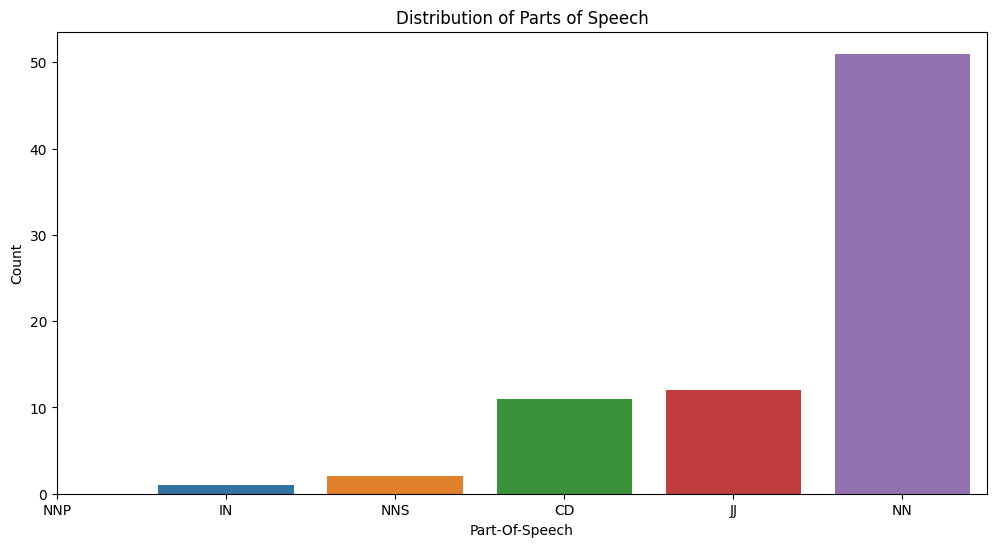

In [114]:
plt.figure(figsize = (12, 6))
sns.barplot(data = pos_df, y = pos_df.index, x = pos_df.values);
labels = list(pos_df.index)
labels.reverse()
plt.xticks(np.arange(6) - 1.0, labels)
plt.title('Distribution of Parts of Speech')
plt.ylabel('Count')
plt.xlabel('Part-Of-Speech')
plt.show();

<br>
<center><b>CONCLUSION</b></center>

* `Nouns occur the most in the resume content`


In [115]:
from nltk import FreqDist
from typing import Iterable
import matplotlib.pyplot as plt

# Function to flatten a nested list
def flatten(lis):
    for item in lis:
        if isinstance(item, Iterable) and not isinstance(item, str):
            for x in flatten(item):
                yield x
        else:
            yield item

# Get the tokenized resumes
tokenized_resumes = list(final_df['content'])

# Split each resume into a list of words
for i in range(len(tokenized_resumes)):
    tokenized_resumes[i] = str(tokenized_resumes[i]).split(" ")

# Flatten the list of lists into a single list
tokenized_resumes = list(flatten(tokenized_resumes))

# Compute the frequency distribution
freq_dist = FreqDist(tokenized_resumes)

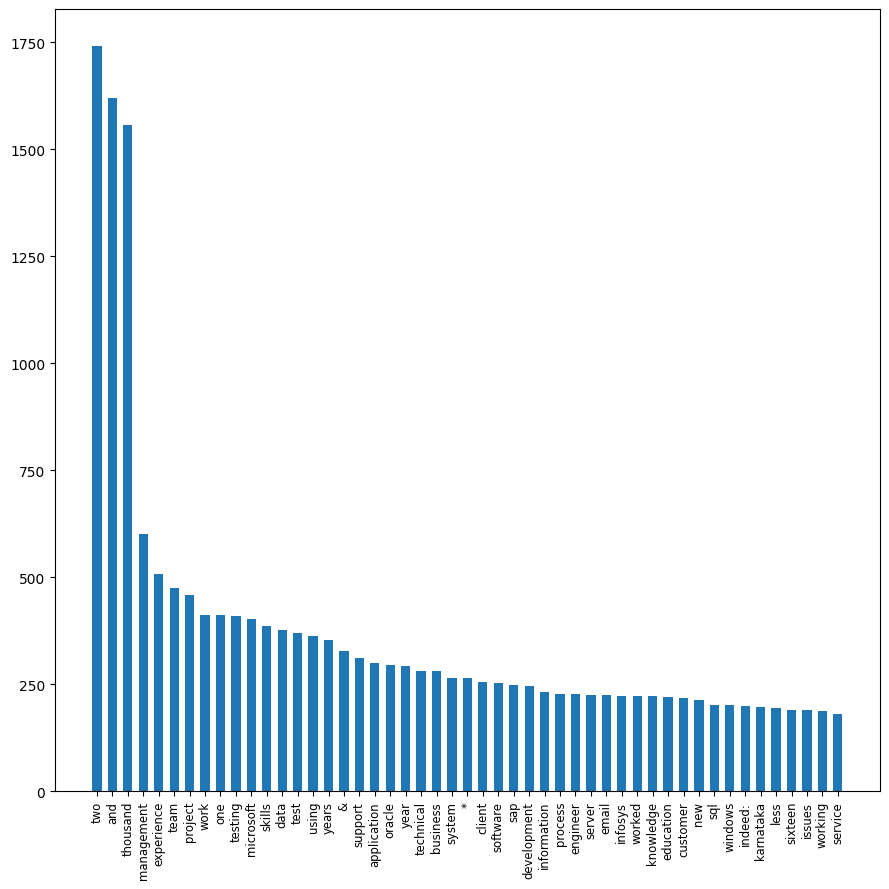

In [116]:
# Select the 50 most common words
fd_common50 = freq_dist.most_common(50)

# Extract the words and frequencies
words = []
frequency = []

# Iterate over the range from 1 to 50
for i in range(1, 50):
    words.append(fd_common50[i][0])
    frequency.append(fd_common50[i][1])

# Create a figure with a size of 9x9 inches
plt.figure(figsize=(9, 9))

# Plot the bar chart
plt.bar(words, frequency, width=0.6)

# Rotate the x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90, fontsize='small')

# Adjust the layout of the plot elements
plt.tight_layout()

# Show the plot
plt.show()


<br>
<center><b>CONCLUSION</b></center>

Some useful insights which can be derived from the above bar graph are as follows :


* `The term "experience" ranked as the fifth most commonly used word, highlighting the significant value placed on experience compared to education within the job market.`

* `Management experience is the fourth most sought after skill looked in the job being applied`
* `Microsoft and Oracle emerged as the most frequently cited companies on the applicants' resumes.`


In [117]:
import matplotlib.pyplot as pyplt
import seaborn as sns

In [118]:
final_df.head(1)

,content,annotation,avg_word_len,total_word_count,total_characters
0,govardhana k senior software engineer bengalur...,"[{'label': ['Companies worked at'], 'points': ...",7.75576,217,1910


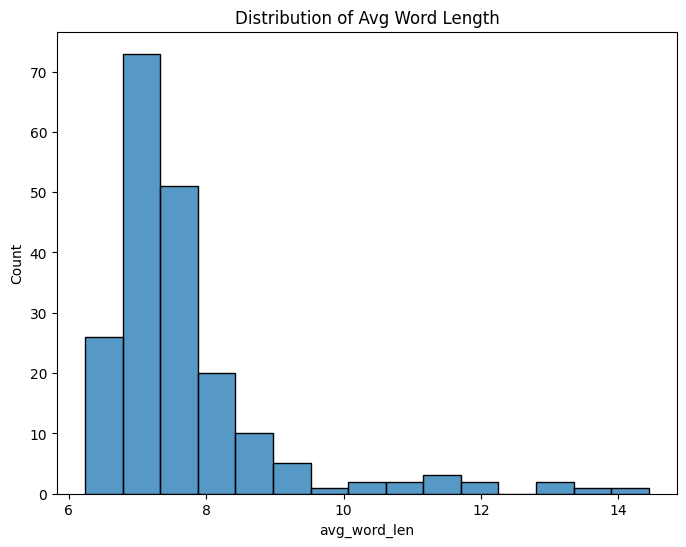

In [119]:
pyplt.figure(figsize=(8, 6))
sns.histplot(final_df['avg_word_len'], bins=15);
pyplt.title('Distribution of Avg Word Length')
pyplt.show()

<br>
<center><b>CONCLUSION</b></center>

* `Bar plot shows that most of the resumes in our dataframe have avarage word length 7`
* `More than 70 rows(resumes) have avarage word lenght 7`

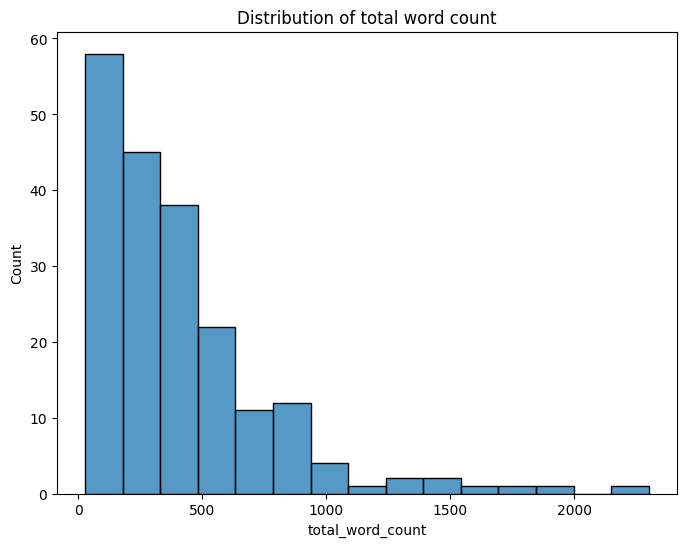

In [120]:
pyplt.figure(figsize=(8, 6))
sns.histplot(final_df['total_word_count'], bins=15);
pyplt.title('Distribution of total word count')
pyplt.show()


<br>
<center><b>CONCLUSION</b></center>

* `More than 120 resumes have total word count less than 500.`
* `There are less resumes that have more than 500 words`
* `Number of resumes which contains more than 1000 word is very few.`

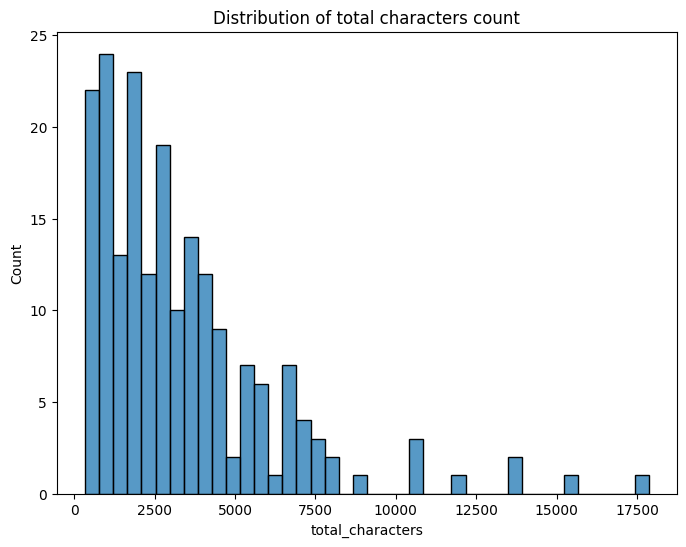

In [121]:
pyplt.figure(figsize=(8, 6))
sns.histplot(final_df['total_characters'], bins=40);
pyplt.title('Distribution of total characters count')
pyplt.show()

<br>
<center><b>CONCLUSION</b></center>

* `Most of the resumes have total characters less than 5000.`

In [122]:
#FINDING MOST COMMON STOPWORDS IN THE CONTENT COLUMN
from collections import Counter
from wordcloud import STOPWORDS

#The code analyzes the 'content' column in a DataFrame and extracts individual words.
#It counts the frequency of each word and filters out common stop words using a predefined set.
#The most frequent stop words are then printed.
words = []


for val in final_df['content']:
    words.extend(str(val).split())

#Create a Counter object to count the frequency of each word
word_counts = Counter(words)
stopword_counts = {word: count for word, count in word_counts.items() if word in STOPWORDS}

sorted_stopwords = sorted(stopword_counts.items(), key=lambda x: x[1], reverse=True)

#LIST
common_stopwords = [word for word in STOPWORDS if word in word_counts.keys()]
common_stopwords.append('https')

commonnums=['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten','thousand']
for i in commonnums:
  common_stopwords.append(i)
#Print the most common stop words and their frequencies
for word, count in sorted_stopwords[:25]:
    print(f'{word}: {count}')

and: 1619
like: 161
also: 79
get: 25
r: 17
since: 16
http: 11
would: 10
i'm: 6
k: 4
hence: 3
else: 2
that's: 2
could: 2
i've: 2
otherwise: 2
ever: 1
however: 1
what's: 1
why's: 1
shall: 1


<br>
<center><b>CONCLUSION</b></center>

* `Most common stopwords used in the resumes are 'and', 'like', 'also'`

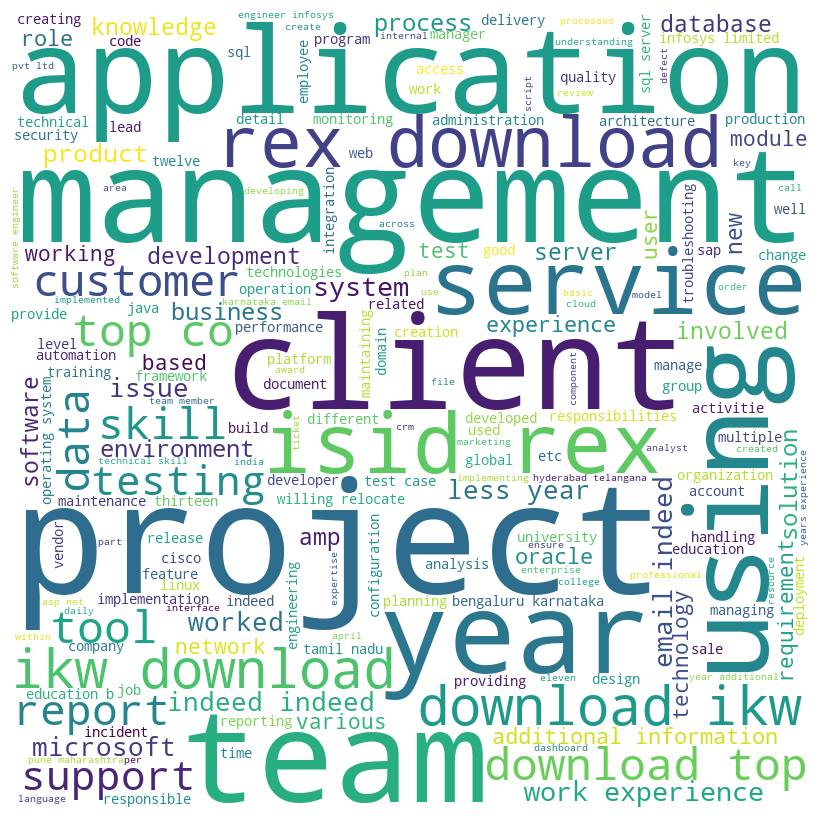

In [123]:
#CREATING WORD CLOUD(FINDING MOST FREQUENT WORDS IN RESUMES)

#The code generates a word cloud visualization based on the 'content' column of a DataFrame.
#It removes common stop words and converts the text to lowercase before creating the word cloud.
#The word cloud represents the most frequent words in the text, with larger words indicating higher frequency.
#The resulting word cloud is displayed.


import matplotlib.pyplot as pyplt
from wordcloud import WordCloud, STOPWORDS

cleaned_text = ""
stopwords = set(STOPWORDS)
stopwords.update(common_stopwords)


for value in final_df.content:
    value = str(value)
    tokens = value.split()
    tokens = [token.lower() for token in tokens if token.lower() not in stopwords]
    cleaned_text += " ".join(tokens) + " "


max_words = 50
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, min_font_size=10).generate(cleaned_text)


pyplt.figure(figsize=(8, 8), facecolor=None)
pyplt.imshow(wordcloud)
pyplt.axis("off")
pyplt.tight_layout(pad=0)

pyplt.show()

<br>
<center><b>CONCLUSION</b></center>

* `Word cloud emphasize that most common words in the resumes excluding stopwords are 'application', 'team',
   'management', 'year', 'project', 'client', 'service'`

In [124]:
#N-GRAM ANALYSIS
import nltk
from nltk import ngrams
from collections import Counter


#The code utilizes NLTK to perform n-gram analysis on the 'content' column of a DataFrame.
#It converts the content into a list of strings, joins them together, and tokenizes the resulting text into individual words.
#It then calculates the counts of unigrams, bigrams, and trigrams using the ngrams function and stores the counts in separate Counter objects.
#This allows for the analysis of the frequency of n-grams in the text data.

import nltk
from nltk import ngrams
from collections import Counter


content_series = final_df['content']


content_list = content_series.astype(str).tolist()


all_content = ' '.join(content_list)

words = nltk.word_tokenize(all_content)


unigrams = list(ngrams(words, 1))
unigram_counts = Counter(unigrams)


bigrams = list(ngrams(words, 2))
bigram_counts = Counter(bigrams)


trigrams = list(ngrams(words, 3))
trigram_counts = Counter(trigrams)




In [125]:
print("Most common unigrams:")
for unigram, count in unigram_counts.most_common(60):
    print(unigram, count)

Most common unigrams:
(':',) 2135
('two',) 1741
('and',) 1621
('thousand',) 1620
('&',) 1089
('management',) 621
('experience',) 520
('project',) 492
('team',) 484
('skills',) 435
('testing',) 419
('work',) 412
('one',) 412
('microsoft',) 407
('data',) 380
('test',) 369
('using',) 365
('years',) 356
('client',) 324
('https',) 322
('support',) 313
('application',) 304
('oracle',) 299
('year',) 294
('*',) 294
('technical',) 282
('business',) 282
('system',) 280
('?',) 277
('isid=rex-download',) 276
('ikw=download-top',) 276
('co=in',) 276
('software',) 266
('sap',) 253
(';',) 252
('development',) 248
('information',) 234
('process',) 229
('engineer',) 228
('infosys',) 228
('knowledge',) 227
('server',) 227
('customer',) 227
('email',) 225
('worked',) 223
('education',) 220
('new',) 214
('tools',) 212
('sql',) 203
('windows',) 202
('indeed',) 200
('systems',) 199
('karnataka',) 196
('less',) 194
('issues',) 194
('sixteen',) 191
('working',) 189
('services',) 182
('service',) 182
('applica

In [126]:
print("Most common bigrams:")
for bigram, count in bigram_counts.most_common(60):
    print(bigram, count)

Most common bigrams:
('two', 'thousand') 1557
('thousand', 'and') 1536
('https', ':') 316
('?', 'isid=rex-download') 276
('isid=rex-download', '&') 276
('&', 'ikw=download-top') 276
('ikw=download-top', '&') 276
('&', 'co=in') 276
('one', 'year') 262
('work', 'experience') 211
('email', 'indeed') 199
('indeed', ':') 199
('less', 'one') 192
('and', 'sixteen') 184
('&', 'amp') 177
('amp', ';') 177
('and', 'fifteen') 158
('and', 'thirteen') 145
('and', 'seventeen') 144
('additional', 'information') 140
('and', 'fourteen') 134
('and', 'twelve') 129
('june', 'two') 120
('and', 'ten') 112
('responsibilities', ':') 108
('bengaluru', 'karnataka') 107
('and', 'eleven') 104
('and', 'eight') 98
('july', 'two') 87
('willing', 'relocate') 86
('infosys', 'limited') 86
('tamil', 'nadu') 83
('hundred', 'and') 83
('may', 'two') 82
('two', 'years') 82
('co=in', 'https') 80
('december', 'two') 77
('september', 'two') 72
('january', 'two') 71
('october', 'two') 69
('and', 'seven') 68
('test', 'cases') 64


In [127]:
print("Most common trigrams:")
for trigram, count in trigram_counts.most_common(60):
    print(trigram, count)

Most common trigrams:
('two', 'thousand', 'and') 1532
('?', 'isid=rex-download', '&') 276
('isid=rex-download', '&', 'ikw=download-top') 276
('&', 'ikw=download-top', '&') 276
('ikw=download-top', '&', 'co=in') 276
('email', 'indeed', ':') 199
('less', 'one', 'year') 192
('thousand', 'and', 'sixteen') 184
('&', 'amp', ';') 177
('thousand', 'and', 'fifteen') 157
('thousand', 'and', 'thirteen') 145
('thousand', 'and', 'seventeen') 144
('thousand', 'and', 'fourteen') 134
('thousand', 'and', 'twelve') 128
('june', 'two', 'thousand') 120
('thousand', 'and', 'ten') 108
('thousand', 'and', 'eleven') 103
('thousand', 'and', 'eight') 98
('july', 'two', 'thousand') 87
('may', 'two', 'thousand') 82
('&', 'co=in', 'https') 80
('co=in', 'https', ':') 80
('december', 'two', 'thousand') 77
('september', 'two', 'thousand') 72
('january', 'two', 'thousand') 71
('october', 'two', 'thousand') 69
('thousand', 'and', 'seven') 68
('august', 'two', 'thousand') 64
('march', 'two', 'thousand') 62
('february', 

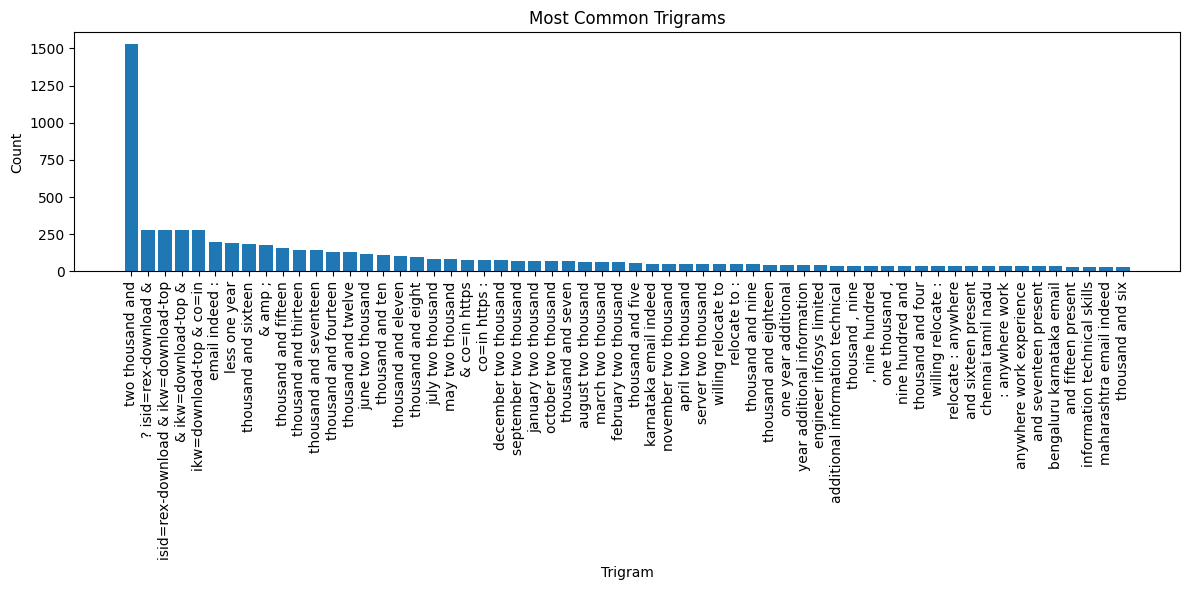

In [128]:
labels = [trigram[0] + ' ' + trigram[1] + ' ' + trigram[2] for trigram, count in trigram_counts.most_common(60)]
counts = [count for trigram, count in trigram_counts.most_common(60)]

pyplt.figure(figsize=(12, 6))
pyplt.bar(labels, counts)
pyplt.xticks(rotation=90)
pyplt.xlabel('Trigram')
pyplt.ylabel('Count')
pyplt.title('Most Common Trigrams')
pyplt.tight_layout()
pyplt.show()

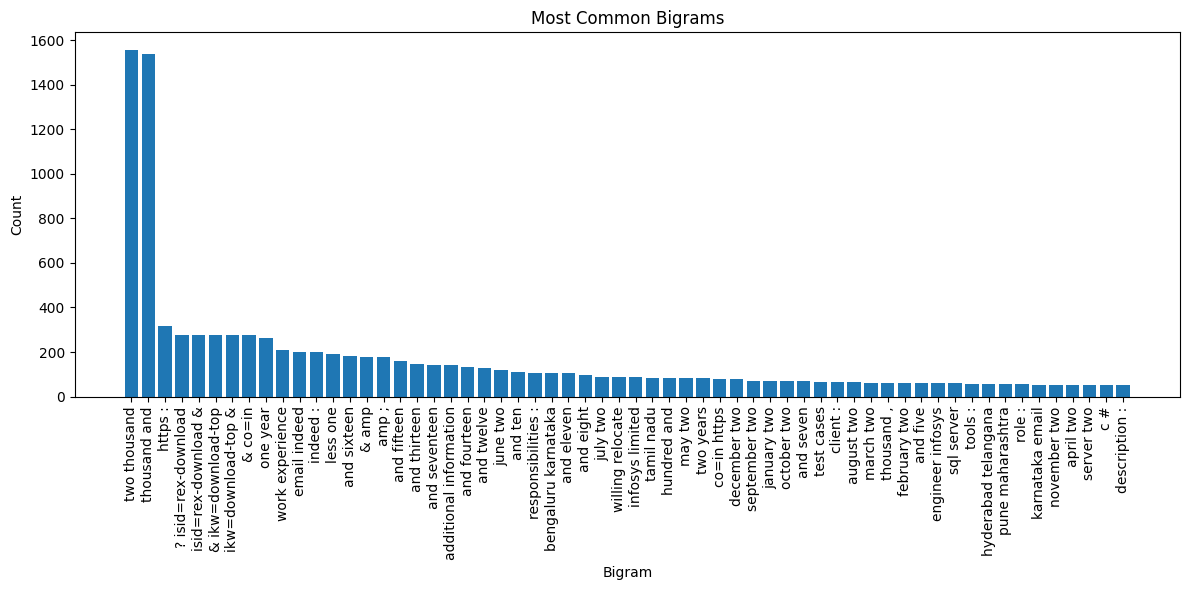

In [129]:
labels = [bigram[0] + ' ' + bigram[1] for bigram, count in bigram_counts.most_common(60)]
counts = [count for bigram, count in bigram_counts.most_common(60)]


pyplt.figure(figsize=(12, 6))
pyplt.bar(labels, counts)
pyplt.xticks(rotation=90)
pyplt.xlabel('Bigram')
pyplt.ylabel('Count')
pyplt.title('Most Common Bigrams')
pyplt.tight_layout()
pyplt.show()


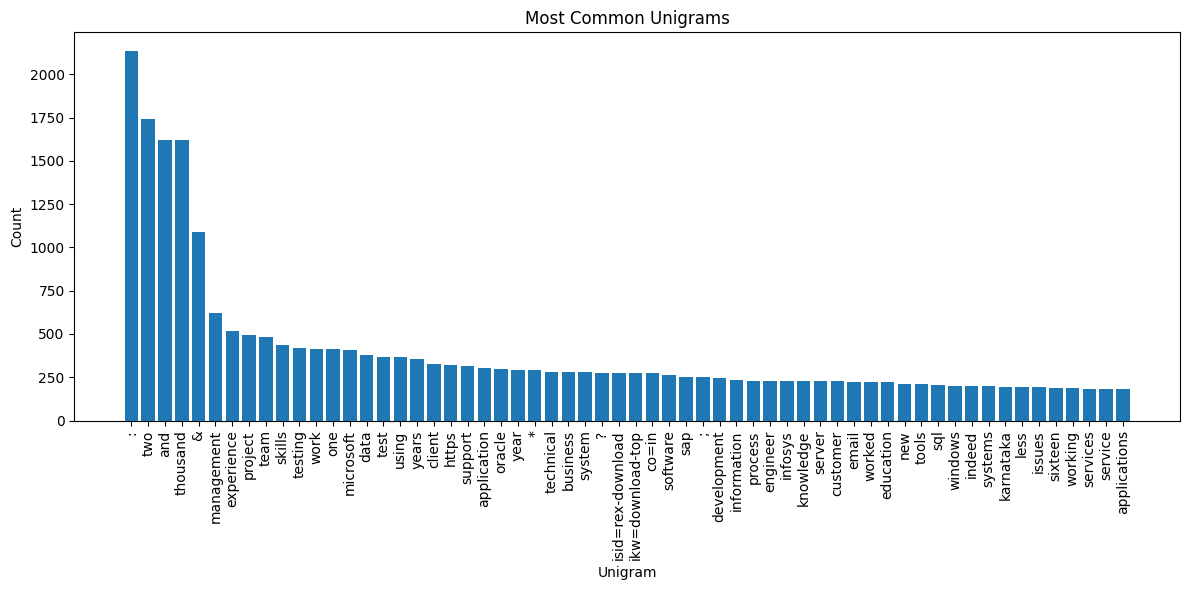

In [130]:

most_common_unigrams = unigram_counts.most_common(60)
labels = [' '.join(unigram) for unigram, count in most_common_unigrams]
counts = [count for unigram, count in most_common_unigrams]


pyplt.figure(figsize=(12, 6))
pyplt.bar(labels, counts)
pyplt.xticks(rotation=90)
pyplt.xlabel('Unigram')
pyplt.ylabel('Count')
pyplt.title('Most Common Unigrams')
pyplt.tight_layout()
pyplt.show()


In [131]:
df

,content,annotation
0,govardhana k senior software engineer bengalur...,"[{'label': ['Companies worked at'], 'points': ..."
1,harini komaravelli test analyst oracle hyderab...,"[{'label': ['Companies worked at'], 'points': ..."
2,hartej kathuria data analyst intern oracle ret...,"[{'label': ['Skills'], 'points': [{'start': 22..."
3,ijas nizamuddin associate consultant state str...,"[{'label': ['Skills'], 'points': [{'start': 46..."
4,imgeeyaul ansari java developer pune maharasht...,"[{'label': ['Skills'], 'points': [{'start': 18..."
...,...,...
195,mansi thanki student jamnagar gujarat email in...,"[{'label': ['College Name'], 'points': [{'star..."
196,anil kumar microsoft azure basic management de...,"[{'label': ['Location'], 'points': [{'start': ..."
197,siddharth choudhary microsoft office suite exp...,"[{'label': ['Skills'], 'points': [{'start': 78..."
198,valarmathi dhandapani investment banking opera...,"[{'label': ['Skills'], 'points': [{'start': 92..."


In [132]:
my_dict = {}
key = []
value = []
for x in df['annotation']:
    for y in x:
        if y['label'] == ['Name']:
            for z in y['points']:
                key.append(z['text'])
        if y['label'] == ['Location']:
            for z in y['points']:
                value.append(z['text'])
        keytuple = tuple(key)
        valuetuple = tuple(value)
        for (a,b) in zip(keytuple,valuetuple):
            my_dict[a] = b
print(my_dict)

{'Govardhana K': 'Bengaluru', 'Harini Komaravelli': 'Hyderabad', 'Hartej Kathuria': 'Hyderabad', 'Ijas Nizamuddin': 'Hyderabad', 'Imgeeyaul Ansari': 'Hyderabad', 'Jay Madhavi': 'Hyderabad', 'Jitendra Babu': 'Hyderabad', 'Jyotirbindu Patnaik': 'Hyderabad', 'Karthihayini C': 'Bengaluru', 'Karthik GV': 'Bengaluru', 'Kartik Sharma': 'Irinchayam B.O', 'Kasturika Borah': 'Pune', 'Kavitha K': 'Pune', 'Kavya U.': 'Pune', 'Khushboo Choudhary': 'Pune', 'kimaya sonawane': 'Navi Mumbai', 'Koushik Katta': 'Chennai', 'Kowsick Somasundaram': 'Bengaluru', 'Lakshika Neelakshi': 'Rajapalaiyam', 'Madas Peddaiah': 'Rajapalaiyam', 'Madhuri Sripathi': 'Hyderabad', 'Mahesh Vijay': 'Hyderabad', 'Manisha Bharti': 'Hyderabad', 'Manjari Singh': 'Hyderabad', 'Mohamed Ameen': 'Hyderabad', 'Mohini Gupta': 'Delhi', 'Navas Koya': 'Delhi', 'Navjyot Singh Rathore': 'Delhi', 'Nazish Alam': 'Delhi', 'Nidhi Pandit': 'Delhi', 'Nikhileshkumar Ikhar': 'Bengaluru', 'Nitin Tr': 'Bengaluru', 'Pradeeba V': 'Salem', 'Prakriti Sha

In [133]:
locationslist = list(my_dict.values())
print(locationslist)
len(locationslist)

['Bengaluru', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Bengaluru', 'Bengaluru', 'Irinchayam B.O', 'Pune', 'Pune', 'Pune', 'Pune', 'Navi Mumbai', 'Chennai', 'Bengaluru', 'Rajapalaiyam', 'Rajapalaiyam', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Bengaluru', 'Bengaluru', 'Salem', 'Bengaluru', 'Bengaluru', 'Noida', 'Noida', 'Noida', 'Thane', 'Thane', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Erode', 'Bengaluru', 'Bengaluru', 'Bengaluru', 'Bengaluru', 'Anantapur', 'Banglore', 'Bengaluru', 'Bangalore', 'Pune,', 'Pune,', 'Bengaluru', 'Bengaluru', 'Bengaluru', 'Bengaluru', 'indeed.com/r/Mohamed-Ameen/\nba052bfa70e4c0b7\n', 'Bengaluru', 'Gurgaon', 'Gurgaon', 'Mangalore', 'Mangalore', 'Chennai', 'Ulhasnagar', 'Ulhasnagar', 'Ghaziabad', 'Bengaluru', 'Bengaluru', 'Bengaluru', 'Bengaluru', 'Bangalore Urban', 'Mangalore', 'Mangalore', 'Mangalore', 'Hyderabad', 'Hyderabad'

195

In [134]:
locationsset = set(my_dict.values())
len(locationsset)
print(locationsset)
locationsseries = pd.Series(locationslist)
locationsdataframe = pd.DataFrame(locationsseries.value_counts())
locationsdataframe.head()
locationsdataframe.to_csv('locationscount.csv')

{'Muzaffarpur', 'Chandigarh', 'Erode', 'Mumbai', 'Trichur,', 'Itarsi', 'Salem', 'Bishnupur', 'Kullu', 'Rajapalaiyam', 'Namakkal', 'Mysore', 'Kolkata', 'Chennai,', 'Ulhasnagar', 'Sulthan Bathery', 'Pune', 'Delhi', 'Navi Mumbai', 'Bilaspur', 'Noida', 'Bangalore Urban', 'Pune,', 'Dewas', 'Karnataka', 'Bengaluru', 'Thiruvananthapuram', 'Bidar', 'Irinchayam B.O', 'Jaipur', 'Gurgaon', 'Orrisha', 'Thane', 'Ghaziabad', 'Chennai', 'Anantapur', 'Palghat,', 'indeed.com/r/Mohamed-Ameen/\nba052bfa70e4c0b7\n', 'Banglore', 'Bangalore', 'hyderbad', 'Coimbatore', 'Faridabad', 'Mangalore', 'Hyderabad', 'New Delhi'}


    ID_0  ISO NAME_0  ID_1                  NAME_1  NL_NAME_1  \
0    105  IND  India     1     Andaman and Nicobar        NaN   
1    105  IND  India     2          Andhra Pradesh        NaN   
2    105  IND  India     3       Arunachal Pradesh        NaN   
3    105  IND  India     4                   Assam        NaN   
4    105  IND  India     5                   Bihar        NaN   
5    105  IND  India     6              Chandigarh        NaN   
6    105  IND  India     7            Chhattisgarh        NaN   
7    105  IND  India     8  Dadra and Nagar Haveli        NaN   
8    105  IND  India     9           Daman and Diu        NaN   
9    105  IND  India    10                   Delhi        NaN   
10   105  IND  India    11                     Goa        NaN   
11   105  IND  India    12                 Gujarat        NaN   
12   105  IND  India    13                 Haryana        NaN   
13   105  IND  India    14        Himachal Pradesh        NaN   
14   105  IND  India    1

<Axes: >

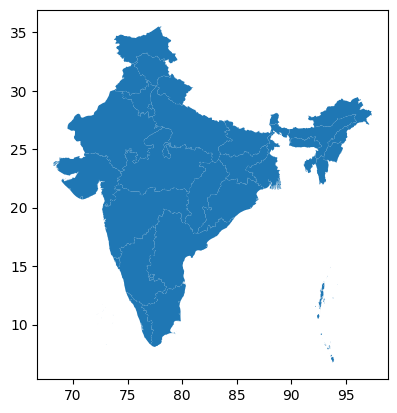

In [135]:
#Importing matplotlib package again
import matplotlib as plt
import geopandas as gpd
import requests# URL of the GeoJSON file
geojson_url = "https://github.com/geohacker/india/raw/master/state/india_state.geojson"

# Downloading the GeoJSON file
response = requests.get(geojson_url)
if response.status_code == 200:
    with open("india_state.geojson", "wb") as file:
        file.write(response.content)

# Load the downloaded GeoJSON file
india_map = gpd.read_file("india_state.geojson")
type(india_map)
print(india_map)
india_map.plot()


In [136]:
#Importing necessary packages again
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
# Reading in data on how many workers are in each state
finalcountdf =  pd.read_csv('readlocationscount.csv')
#Viewing the data
finalcountdf.head()
#Merging data
merged_data = finalcountdf.merge(india_map, on='NAME_1', how='outer')
# Replace NaN values with 0s in Count column to make sure all states display themselves
merged_data['Count'].fillna(0, inplace=True)
#Getting an accurate count of applicants in each state
raw_series =  merged_data.groupby('NAME_1')['Count'].sum()
#Converting this series to a dataframe
raw_df = pd.DataFrame(raw_series)
#Looking at merged_data and its type
print(merged_data)
type(merged_data)

         City  Count       NAME_1   ID_0  ISO NAME_0  ID_1  NL_NAME_1  \
0   Bengaluru   34.0    Karnataka  105.0  IND  India  17.0        NaN   
1   Bangalore    7.0    Karnataka  105.0  IND  India  17.0        NaN   
2   Mangalore    5.0    Karnataka  105.0  IND  India  17.0        NaN   
3       Bidar    3.0    Karnataka  105.0  IND  India  17.0        NaN   
4   Karnataka    3.0    Karnataka  105.0  IND  India  17.0        NaN   
..        ...    ...          ...    ...  ...    ...   ...        ...   
61        NaN    0.0       Punjab  105.0  IND  India  28.0        NaN   
62        NaN    0.0    Rajasthan  105.0  IND  India  29.0        NaN   
63        NaN    0.0       Sikkim  105.0  IND  India  30.0        NaN   
64        NaN    0.0      Tripura  105.0  IND  India  32.0        NaN   
65        NaN    0.0  Uttaranchal  105.0  IND  India  34.0        NaN   

                      VARNAME_1 TYPE_1 ENGTYPE_1  \
0                 Maisur|Mysore  State     State   
1                 M

pandas.core.frame.DataFrame

In [137]:
#Looking at raw_data and its type
print(raw_df)
type(raw_df)

                        Count
NAME_1                       
Andaman and Nicobar       0.0
Andhra Pradesh           36.0
Arunachal Pradesh         0.0
Assam                     0.0
Bihar                     1.0
Chandigarh                6.0
Chhattisgarh              0.0
Dadra and Nagar Haveli    0.0
Daman and Diu             0.0
Delhi                     7.0
Goa                       0.0
Gujarat                   0.0
Haryana                   6.0
Himachal Pradesh          2.0
Jammu and Kashmir         0.0
Jharkhand                 0.0
Karnataka                54.0
Kerala                    7.0
Lakshadweep               0.0
Madhya Pradesh            3.0
Maharashtra              32.0
Mahrashtra                7.0
Manipur                   0.0
Meghalaya                 0.0
Mizoram                   0.0
Nagaland                  0.0
Orissa                    1.0
Puducherry                0.0
Punjab                    0.0
Rajashtan                 1.0
Rajasthan                 0.0
Sikkim    

pandas.core.frame.DataFrame

In [138]:
#Merging data
final_geodf = raw_df.merge(india_map, on='NAME_1', how='outer')
print(final_geodf)
type(final_geodf)

                    NAME_1  Count   ID_0  ISO NAME_0  ID_1  NL_NAME_1  \
0      Andaman and Nicobar    0.0  105.0  IND  India   1.0        NaN   
1           Andhra Pradesh   36.0  105.0  IND  India   2.0        NaN   
2        Arunachal Pradesh    0.0  105.0  IND  India   3.0        NaN   
3                    Assam    0.0  105.0  IND  India   4.0        NaN   
4                    Bihar    1.0  105.0  IND  India   5.0        NaN   
5               Chandigarh    6.0  105.0  IND  India   6.0        NaN   
6             Chhattisgarh    0.0  105.0  IND  India   7.0        NaN   
7   Dadra and Nagar Haveli    0.0  105.0  IND  India   8.0        NaN   
8            Daman and Diu    0.0  105.0  IND  India   9.0        NaN   
9                    Delhi    7.0  105.0  IND  India  10.0        NaN   
10                     Goa    0.0  105.0  IND  India  11.0        NaN   
11                 Gujarat    0.0  105.0  IND  India  12.0        NaN   
12                 Haryana    6.0  105.0  IND  Indi

pandas.core.frame.DataFrame

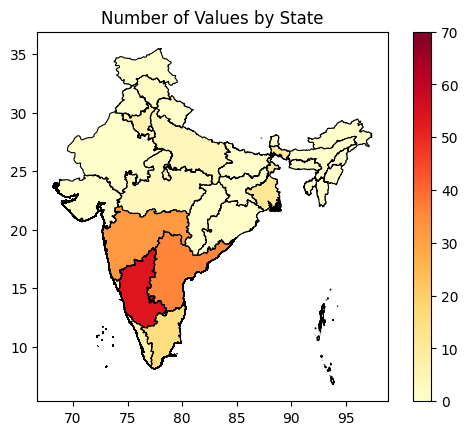

In [139]:
#Importing necessary packages again
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

#Converting to GeoDataFrame and plotting
gdf = gpd.GeoDataFrame(final_geodf)
gdf.plot(column='Count', cmap='YlOrRd', linewidth=0.8, edgecolor='Black', vmin =0, vmax=70, legend=True)

# Add a title and display the plot
plt.title('Number of Values by State')
plt.show()

# NER MODEL BUILDING USING SPACY - NISHCHAY VAID

### We will utilize NER MODEL with python's SpaCy package to fetch resume details.

### SpaCy's models are statistical and rely on patterns in training data to make predictions. These predictions are probabilistic and not absolute. The accuracy depends on the quality of training data.

In [140]:
import spacy
import pickle
import random
import pandas as pd

In [141]:
model_file="ner_model"
iterations=20

In [142]:
df = pd.read_json('Resume.json', lines=True)
df.head()

,content,annotation
0,Govardhana K\nSenior Software Engineer\n\nBeng...,"[{'label': ['Companies worked at'], 'points': ..."
1,"Harini Komaravelli\nTest Analyst at Oracle, Hy...","[{'label': ['Companies worked at'], 'points': ..."
2,Hartej Kathuria\nData Analyst Intern - Oracle ...,"[{'label': ['Skills'], 'points': [{'start': 22..."
3,Ijas Nizamuddin\nAssociate Consultant - State ...,"[{'label': ['Skills'], 'points': [{'start': 46..."
4,"Imgeeyaul Ansari\njava developer\n\nPune, Maha...","[{'label': ['Skills'], 'points': [{'start': 18..."


In [143]:
# Personal Custom Tags Dictionary
entity_dict = {
    'Name': 'Name', 
    'College Name': 'CollegeName',
    'Degree': 'DEGREE',
    'Graduation Year': 'GraduationYear',
    'Years of Experience': 'YearOfExperience',
    'Companies worked at': 'Company',
    'Designation': 'Designation',
    'Skills': 'Skills',
    'Location': 'Location',
    'Email Address': 'EmailAddress'
    }

In [144]:
#For merging intervals the algorithm used:
#1. Sort the intervals in increasing order.
#2. Push the first interval on the stack.
#3. Iterate through intervals and for each one compare current interval with the top of the stack and:
    #A. If current interval does not overlap, push on to stack.
    #B. If current interval does overlap, merge both intervals in to one and push on to stack.
#4. At the end return stack.



def mergeIntervals(intervals):
    sorted_by_lower_bound = sorted(intervals, key=lambda tup: tup[0])
    merged = []
# lower and higher represent the bounds of the current run of merges
    for higher in sorted_by_lower_bound:
        if not merged:
            merged.append(higher)
        else:
            lower = merged[-1]
            # test for intersection between lower and higher:
            if higher[0] <= lower[1]: # new interval overlaps current run
                if lower[2] is higher[2]:
                    upper_bound = max(lower[1], higher[1]) # merge with the current run
                    merged[-1] = (lower[0], upper_bound, lower[2]) # replace by merged interval
                else:
                    if lower[1] > higher[1]:
                        merged[-1] = lower
                    else:
                        merged[-1] = (lower[0], higher[1], higher[2])
            else:
                merged.append(higher)

    return merged

In [145]:
#From 'annotation' column, we are extracting the starting index, ending index and entity label

def get_entities(df):
    
    entities = []
    
    for i in range(len(df)):
        entity = []
    
        for annot in df['annotation'][i]:
            try:
                ent = entity_dict[annot['label'][0]]
                start = annot['points'][0]['start']
                end = annot['points'][0]['end'] + 1
                entity.append((start, end, ent))
            except:
                pass
    
        entity = mergeIntervals(entity)
        entities.append(entity)
    
    return entities

In [146]:
# Adding a new column 'entities'
df['entities'] = get_entities(df)
df.head()

,content,annotation,entities
0,Govardhana K\nSenior Software Engineer\n\nBeng...,"[{'label': ['Companies worked at'], 'points': ...","[(0, 12, Name), (13, 38, Designation), (39, 48..."
1,"Harini Komaravelli\nTest Analyst at Oracle, Hy...","[{'label': ['Companies worked at'], 'points': ...","[(0, 18, Name), (19, 31, Designation), (35, 41..."
2,Hartej Kathuria\nData Analyst Intern - Oracle ...,"[{'label': ['Skills'], 'points': [{'start': 22...","[(0, 15, Name), (16, 35, Designation), (38, 52..."
3,Ijas Nizamuddin\nAssociate Consultant - State ...,"[{'label': ['Skills'], 'points': [{'start': 46...","[(0, 15, Name), (16, 36, Designation), (39, 52..."
4,"Imgeeyaul Ansari\njava developer\n\nPune, Maha...","[{'label': ['Skills'], 'points': [{'start': 18...","[(0, 16, Name), (17, 31, Designation), (33, 37..."


In [147]:
a=[]

In [148]:
for i in range(len(df)):
    a.append((df['content'][i],{'entities':df['entities'][i]}))

In [149]:
import re


def trim_entity_spans(data: list) -> list:
    """Removes leading and trailing white spaces from entity spans.

    Args:
        data (list): The data to be cleaned in spaCy JSON format.

    Returns:
        list: The cleaned data.
    """
    invalid_span_tokens = re.compile(r'\s')

    cleaned_data = []
    for text, annotations in data:
        entities = annotations['entities']
        valid_entities = []
        for start, end, label in entities:
            valid_start = start
            valid_end = end
            while valid_start < len(text) and invalid_span_tokens.match(
                    text[valid_start]):
                valid_start += 1
            while valid_end > 1 and invalid_span_tokens.match(
                    text[valid_end - 1]):
                valid_end -= 1
            valid_entities.append([valid_start, valid_end, label])
        cleaned_data.append([text, {'entities': valid_entities}])

    return cleaned_data

In [150]:
a = trim_entity_spans(a)

In [151]:
nlp = spacy.blank('en')  
print("Created blank NLP model")

Created blank NLP model


In [152]:
# Create NLP Pipeline
if 'ner' not in nlp.pipe_names:
    ner_pipe = nlp.add_pipe('ner')
else:
    ner_pipe = nlp.get_pipe('ner')

In [153]:
# Add entities labels to the ner pipeline
for text, annotations in a:
    for entity in annotations.get('entities'):
        ner_pipe.add_label(entity[2].upper())

### We will test the model and dump each resume in a text file 

In [154]:
from spacy.training.example import Example
# get names of other pipes to disable them during training
other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
# train NER Model
with nlp.disable_pipes(*other_pipes):  # only train NER
    optimizer = nlp.initialize()
    for itn in range(iterations):
        print("Iteration Number:" + str(itn))
        # At each iteration, the training data is shuffled to ensure 
        #the model doesn’t make any generalisations based on the order of examples.
        random.shuffle(a)
        losses = {}
        for text, annotations in a:
            doc = nlp.make_doc(text)
            example = Example.from_dict(doc, annotations)
            nlp.update([example], sgd=optimizer,losses=losses, drop=0.3)
            print("losses", losses)

Iteration Number:0
losses {'ner': 615.1614027023315}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Asha Subbaiah
(Microsoft Partner Readiness Operati..." with entities "[[0, 13, 'Name'], [15, 76, 'Designation'], [79, 92...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Ganesh AlalaSundaram
A Dev-Test Professional with ..." with entities "[[0, 20, 'Name'], [50, 56, 'YearOfExperience'], [1...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 1190.0286449193954}
losses {'ner': 1286.9466081857681}
losses {'ner': 1364.8343116641045}
losses {'ner': 1889.531853377819}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Jyotirbindu Patnaik
Associate consultant@SAP labs ..." with entities "[[0, 40, 'Designation'], [73, 82, 'Location'], [11...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Tejasri Gunnam
Bengaluru, Karnataka - Email me on ..." with entities "[[0, 14, 'Name'], [15, 24, 'Location'], [58, 102, ...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\Nishchay Vaid\AppData\Local\P

losses {'ner': 2612.229185760021}
losses {'ner': 3072.8023814558983}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Rupesh Reddy
Technology Consultant - EIT Services ..." with entities "[[0, 12, 'Name'], [13, 34, 'Designation'], [37, 71...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "PRASHANTH BADALA
Devops Engineer ,Cloud Engineer -..." with entities "[[0, 16, 'Name'], [17, 32, 'Designation'], [34, 48...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 4197.049859941006}
losses {'ner': 4239.698160707951}
losses {'ner': 6221.238464891911}
losses {'ner': 6420.162399619818}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Pankaj Bhosale
Microsoft SQL-SERVER

Dhule, Mahara..." with entities "[[0, 14, 'Name'], [15, 35, 'Designation'], [37, 42...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Rahul Tayade
Global Production Support Lead, - Inf..." with entities "[[0, 12, 'Name'], [13, 43, 'Designation'], [47, 58...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 7262.466806262732}
losses {'ner': 8227.456857532263}
losses {'ner': 8754.331067889929}
losses {'ner': 9052.087405055761}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Koushik Katta
Devops

Hyderabad, Telangana - Email..." with entities "[[0, 13, 'Name'], [22, 31, 'Location'], [65, 108, ...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Zaheer Uddin
Technical Project Manager

Hyderabad,..." with entities "[[0, 12, 'Name'], [13, 38, 'Designation'], [40, 49...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 9066.897226960165}
losses {'ner': 9672.066158921225}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Keshav Dhawale
3 TCS Security guard Access Control..." with entities "[[0, 14, 'Name'], [17, 35, 'Designation'], [56, 62...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Suresh Kanagala
Architecture SharePoint/Office 365..." with entities "[[0, 15, 'Name'], [70, 79, 'Location'], [113, 159,...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 9686.956404062832}
losses {'ner': 9733.601868912127}
losses {'ner': 9757.445464528391}
losses {'ner': 9791.185669492821}
losses {'ner': 9805.095761511804}
losses {'ner': 9830.350354596609}
losses {'ner': 9841.956096973732}
losses {'ner': 9867.454923043664}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Nitin Verma
Assisting Microsoft Partners - Exchang..." with entities "[[0, 11, 'Name'], [12, 69, 'Designation'], [71, 75...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "VARUN AHLUWALIA
Quantitative Analyst

- Email me o..." with entities "[[0, 15, 'Name'], [16, 36, 'Designation'], [61, 10...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\Nishchay Vaid\AppData\Local\P

losses {'ner': 9886.918498459108}
losses {'ner': 9923.564169689384}
losses {'ner': 9960.923771140991}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Imgeeyaul Ansari
java developer

Pune, Maharashtra..." with entities "[[0, 16, 'Name'], [17, 31, 'Designation'], [33, 37...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 10179.903261838375}
losses {'ner': 10306.314758686243}
losses {'ner': 10339.299327693774}
losses {'ner': 10379.473124137043}
losses {'ner': 10463.554413815855}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Madhava Konjeti
HR Executive

Bengaluru, Karnataka..." with entities "[[0, 15, 'Name'], [16, 28, 'Designation'], [30, 39...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 10521.865882752358}
losses {'ner': 10660.587024567543}
losses {'ner': 10674.554059151658}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Kandrapu Reddy
Senior Travel Operations (Domestic,..." with entities "[[0, 14, 'Name'], [15, 39, 'Designation'], [78, 11...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "amarjyot sodhi
Voice and Accent Trainer :Masters i..." with entities "[[0, 14, 'Name'], [15, 39, 'Designation'], [41, 80...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 10693.926560066739}
losses {'ner': 10717.009931268629}
losses {'ner': 10757.934750752633}
losses {'ner': 10838.829319484425}
losses {'ner': 10894.504086391624}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Pavithra M
"Infosys" internship

Bengaluru, Karnat..." with entities "[[0, 10, 'Name'], [12, 19, 'Company'], [21, 31, 'D...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Pawan Nag
Microsoft Certified System Engineer

Del..." with entities "[[0, 9, 'Name'], [10, 19, 'Designation'], [20, 45,...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 10923.962022660417}
losses {'ner': 10945.498978308817}
losses {'ner': 10988.802394921186}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Madhuri Sripathi
Banglore, Karnataka, Karnataka - ..." with entities "[[0, 16, 'Name'], [17, 25, 'Location'], [62, 117, ...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 11059.434849789592}
losses {'ner': 11100.330743530874}
losses {'ner': 11127.694790176225}
losses {'ner': 11133.492920938872}
losses {'ner': 11147.457812607863}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Aarti Pimplay
Operations Center Shift Manager (OCS..." with entities "[[0, 13, 'Name'], [14, 52, 'Designation'], [76, 11...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Jatin Arora
SDET Automation Engineer, Infosys - CR..." with entities "[[0, 11, 'Name'], [12, 36, 'Designation'], [38, 45...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 11160.41867173795}
losses {'ner': 11178.368849460014}
losses {'ner': 11211.074266354908}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Ravi Shivgond
Bidar, Karnataka - Email me on Indee..." with entities "[[0, 13, 'Name'], [14, 19, 'Location'], [53, 96, '...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Saurabh Sandhikar
SAURABH SANDHIKAR

Hyderabad, Te..." with entities "[[0, 17, 'Name'], [37, 46, 'Location'], [80, 128, ...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 11232.887440161923}
losses {'ner': 11415.336027221898}
losses {'ner': 11660.895097332219}
losses {'ner': 11697.984228822197}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Puneeth R
Escalation Specialist - HiPower Support ..." with entities "[[0, 9, 'Name'], [10, 31, 'Designation'], [34, 56,...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 11708.767486337822}
losses {'ner': 11736.847911664534}
losses {'ner': 11751.843441176545}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Paul Rajiv
Secunderabad, Andhra Pradesh - Email me..." with entities "[[0, 10, 'Name'], [11, 23, 'Location'], [62, 103, ...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Jacob Philip
Kottayam, Kerala - Email me on Indeed..." with entities "[[0, 12, 'Name'], [13, 21, 'Location'], [52, 94, '...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 11878.562600839268}
losses {'ner': 11892.57830815646}
losses {'ner': 11905.503111173563}
losses {'ner': 12084.608260085039}
losses {'ner': 12191.67619137948}
losses {'ner': 12202.198114809085}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Akansha Jain
Pune, Maharashtra - Email me on Indee..." with entities "[[0, 12, 'Name'], [13, 18, 'Location'], [53, 95, '...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Sridevi H
Bangalore, Karnataka - Email me on Indee..." with entities "[[0, 9, 'Name'], [10, 19, 'Location'], [53, 92, 'E...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 12308.62976216941}
losses {'ner': 12318.734532522765}
losses {'ner': 12333.330100885873}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Siddhartha Chetri
7 years of experience in IT Netw..." with entities "[[0, 17, 'Name'], [18, 25, 'YearOfExperience'], [2...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Krishna Prasad
Patna, Bihar - Email me on Indeed: ..." with entities "[[0, 14, 'Name'], [15, 20, 'Location'], [50, 94, '...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 12352.130783622453}
losses {'ner': 12504.865180676172}
losses {'ner': 12523.522540609956}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Senthil Kumar
Senior Technical Lead - HCL Cisco

-..." with entities "[[0, 13, 'Name'], [14, 35, 'Designation'], [38, 47...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 12704.021688263536}
losses {'ner': 12745.20431114328}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Vineeth Vijayan
"Store Executive" - Orange City Ho..." with entities "[[0, 15, 'Name'], [17, 32, 'Designation'], [36, 77...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Shraddha Achar
Mathura, Uttar Pradesh - Email me o..." with entities "[[0, 14, 'Name'], [15, 22, 'Location'], [60, 105, ...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 12764.534753136795}
losses {'ner': 12774.08969774236}
losses {'ner': 12791.686259410588}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Sharan Adla
- Email me on Indeed: indeed.com/r/Sha..." with entities "[[0, 11, 'Name'], [34, 75, 'EmailAddress'], [86, 9...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 12818.443788486711}
losses {'ner': 12827.92305773647}
losses {'ner': 12846.481497193978}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Gunjan Nayyar
Hoshiarpur, Punjab - Email me on Ind..." with entities "[[0, 13, 'Name'], [14, 24, 'Location'], [55, 98, '...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Angad Waghmare
Pune, Maharashtra - Email me on Ind..." with entities "[[0, 14, 'Name'], [15, 19, 'Location'], [55, 99, '...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 12868.52622314296}
losses {'ner': 12879.5684638807}
losses {'ner': 12946.150404576343}
losses {'ner': 12988.536300995882}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Navas Koya
Test Engineer

Mangalore, Karnataka - E..." with entities "[[0, 10, 'Name'], [11, 24, 'Designation'], [26, 35...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Ravi Shankar
Working as Escalation Engineer with M..." with entities "[[0, 12, 'Name'], [13, 43, 'Designation'], [49, 58...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 13056.466956975286}
losses {'ner': 13089.196405549088}
losses {'ner': 13142.852914301026}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Srushti Bhadale
Mumbai, Maharashtra - Email me on ..." with entities "[[0, 15, 'Name'], [16, 22, 'Location'], [58, 103, ...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Chhaya Prabhale
Kharadi, Pune, 411014, IN - Email ..." with entities "[[0, 15, 'Name'], [16, 23, 'Location'], [64, 110, ...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 13151.054603290368}
losses {'ner': 13164.185513480423}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Mohammed Murtuza
Major Incident Manager / Escalati..." with entities "[[0, 16, 'Name'], [17, 60, 'Designation'], [63, 78...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Priyesh Dubey
Azure Developer with 9 Yrs 8 months ..." with entities "[[0, 13, 'Name'], [14, 29, 'Designation'], [35, 48...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 13178.860449916845}
losses {'ner': 13209.40789039116}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Puneet Bhandari
SAP SD lead - Microsoft IT

Pune, ..." with entities "[[0, 15, 'Name'], [16, 27, 'Designation'], [30, 39...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 13228.617797372714}
losses {'ner': 13239.280848152626}
losses {'ner': 13253.705302678103}
losses {'ner': 13264.19156424659}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "B. Gokul
Gokul, Uttar Pradesh - Email me on Indeed..." with entities "[[0, 8, 'Location'], [9, 14, 'Location'], [52, 89,...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Vinay Singhal
New Delhi, Delhi - Email me on Indee..." with entities "[[0, 13, 'Name'], [14, 23, 'Location'], [53, 96, '...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\Nishchay Vaid\AppData\Local\P

losses {'ner': 13326.453041661109}
losses {'ner': 13352.001127403739}
losses {'ner': 13363.511332334934}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Mayank Shukla
Infosys group as a Test Analyst - In..." with entities "[[0, 13, 'Name'], [33, 45, 'Designation'], [48, 81...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 13397.023295789448}
losses {'ner': 13416.830857396752}
losses {'ner': 13434.11359596152}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Kavitha K
Senior System Engineer - Infosys Limited..." with entities "[[0, 9, 'Name'], [10, 32, 'Designation'], [35, 50,...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Rajeev Kumar
Senior Associate Consultant - Infosys..." with entities "[[0, 12, 'Name'], [13, 40, 'Designation'], [43, 64...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 13448.999735165233}
losses {'ner': 13601.542352247829}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Jaspreet Kaur
Oceanic Consultants as a HR Executiv..." with entities "[[0, 13, 'Name'], [14, 33, 'Company'], [39, 51, 'C...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 13629.16520563571}
losses {'ner': 13644.139119981632}
losses {'ner': 13667.18597792766}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Hartej Kathuria
Data Analyst Intern - Oracle Retai..." with entities "[[0, 15, 'Name'], [16, 35, 'Designation'], [38, 51...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Urshila Lohani
Senior Corporate Account Executive ..." with entities "[[0, 14, 'Name'], [15, 49, 'Designation'], [52, 59...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 13695.656164243359}
losses {'ner': 13726.481395430523}
losses {'ner': 13769.972012667307}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Srinivas VO
Sr. Test Manager

Mumbai, Maharashtra ..." with entities "[[0, 11, 'Name'], [12, 28, 'Designation'], [30, 36...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 13794.733525504971}
losses {'ner': 13805.333423099486}
losses {'ner': 13844.4190311913}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Sameer Kujur
Orrisha - Email me on Indeed: indeed...." with entities "[[0, 12, 'Name'], [13, 20, 'Location'], [43, 85, '...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Ram Edupuganti
Software Development Director - Ora..." with entities "[[0, 14, 'Name'], [15, 44, 'Designation'], [47, 57...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 13915.933765167501}
losses {'ner': 13937.296929650074}
losses {'ner': 13946.45813137937}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Fenil Francis
head of operation and logistics

Tri..." with entities "[[0, 13, 'Name'], [14, 45, 'Designation'], [47, 55...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Mahesh Vijay
Bengaluru, Karnataka - Email me on In..." with entities "[[0, 12, 'Name'], [13, 22, 'Location'], [56, 98, '...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 13994.09104334588}
losses {'ner': 14016.344922718943}
losses {'ner': 14156.027476705745}
losses {'ner': 14181.020901534434}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Mohini Gupta
Server Support Engineer

Gurgaon, Har..." with entities "[[0, 12, 'Name'], [13, 36, 'Designation'], [38, 45...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 14414.64782215582}
losses {'ner': 14463.322608067509}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Sanand Pal
SQL and MSBI Developer with experience ..." with entities "[[0, 10, 'Name'], [11, 33, 'Designation'], [85, 95...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Puneet Singh
Associate Software Engineer

Bengalur..." with entities "[[0, 12, 'Name'], [13, 40, 'Designation'], [42, 51...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 14525.60305082612}
losses {'ner': 14552.317073009992}
losses {'ner': 14570.559439983892}
losses {'ner': 14604.547595480719}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Arpit Godha
Senior Process Executive

Jaipur, Raja..." with entities "[[0, 11, 'Name'], [12, 36, 'Designation'], [38, 44...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Chaban kumar Debbarma
Tripura - Email me on Indeed..." with entities "[[0, 21, 'Name'], [22, 29, 'Location'], [52, 103, ...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 14612.233948928686}
losses {'ner': 14622.89645609927}
losses {'ner': 14633.216644020773}
losses {'ner': 14728.344383785625}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Debasish Dasgupta
Trainer-Finacle-Core Banking Sol..." with entities "[[0, 17, 'Name'], [18, 56, 'Designation'], [57, 64...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 14759.139213923205}
losses {'ner': 14814.537698996093}
losses {'ner': 14882.602845919158}
losses {'ner': 14898.324716787833}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Yathishwaran P
Maximo Consultant - Infosys Limited..." with entities "[[0, 14, 'Name'], [15, 32, 'Designation'], [35, 50...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 15003.418187919586}
losses {'ner': 15067.18655384827}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Ajay Elango
Software Engineer

Bangalore City, Kar..." with entities "[[717, 748, 'CollegeName'], [6642, 6696, 'DEGREE']...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Pratibha P
Principal Consultant at Oracle

Bengalu..." with entities "[[0, 10, 'Name'], [11, 31, 'Designation'], [35, 41...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 15097.645112570886}
losses {'ner': 15144.944170084333}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Pradeeba V
LEAD ENGINEER - CISCO

- Email me on In..." with entities "[[0, 10, 'Name'], [11, 24, 'Designation'], [27, 32...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 15238.849108939588}
losses {'ner': 15265.098705892799}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Soumya Balan
IT SUPPORT

Sulthan Bathery, Kerala, ..." with entities "[[0, 12, 'Name'], [13, 23, 'Designation'], [25, 40...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Nidhi Pandit
Test Engineer - Infosys Limited

- Em..." with entities "[[0, 12, 'Name'], [13, 26, 'Designation'], [29, 44...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 15363.941006307838}
losses {'ner': 15384.7698041951}
losses {'ner': 15391.135698310121}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Avani Priya
- Email me on Indeed: indeed.com/r/Ava..." with entities "[[0, 11, 'Name'], [34, 75, 'EmailAddress'], [94, 1...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 15677.378769270166}
losses {'ner': 15759.78334571972}
losses {'ner': 15777.850168649391}
losses {'ner': 15789.92243201644}
losses {'ner': 15801.367934982945}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Praveen Bhaskar
Program Manager (Software Delivery..." with entities "[[0, 15, 'Name'], [16, 51, 'Designation'], [54, 67...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Laya A
Cluster HR Manager - Velammal New

Chennai,..." with entities "[[0, 6, 'Name'], [7, 25, 'Designation'], [28, 40, ...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 15813.331082458195}
losses {'ner': 15939.616674000345}
losses {'ner': 15950.081882763054}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Shreyanshu Gupta
Software Development Engineer wit..." with entities "[[0, 16, 'Name'], [17, 46, 'Designation'], [52, 60...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Puran Mal
Jaipur, Rajasthan - Email me on Indeed: ..." with entities "[[0, 9, 'Name'], [10, 16, 'Location'], [50, 89, 'E...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 15958.050506525478}
losses {'ner': 15974.735985612357}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Shaik Tazuddin
Senior Process Executive - STAR Ind..." with entities "[[0, 14, 'Name'], [15, 39, 'Designation'], [42, 52...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 16014.399087027507}
losses {'ner': 16029.001324705443}
losses {'ner': 16248.64444880899}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Abdul B
Arabic Language supporter (Content Analyst..." with entities "[[0, 7, 'Name'], [8, 51, 'Designation'], [53, 62, ...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 16271.716085792988}
losses {'ner': 16293.071545483257}
losses {'ner': 16332.037295758175}
losses {'ner': 16346.732884990506}
losses {'ner': 16368.627491708317}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Karthik G V
Program Manager, Product Manager, Prod..." with entities "[[0, 11, 'Name'], [12, 28, 'Designation'], [136, 1...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Roshan Sinha
Application Developer - SAP ABAP

Kol..." with entities "[[0, 12, 'Name'], [13, 34, 'Designation'], [37, 45...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 16427.10978807825}
losses {'ner': 16438.09765906481}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Palani S
Senior Technology Support Executive at In..." with entities "[[0, 8, 'Name'], [9, 44, 'Designation'], [48, 55, ...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 16639.318492008726}
losses {'ner': 16645.968180471722}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Nida Khan
Tech Support Executive - Teleperformance..." with entities "[[0, 32, 'Designation'], [35, 64, 'Company'], [66,...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Vishwanath P
Senior Executive (MIS & Audit) - Job ..." with entities "[[0, 12, 'Name'], [13, 43, 'Designation'], [61, 93...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 16661.29886218674}
losses {'ner': 16676.634440442227}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Raktim Podder
6+ Exp in banking operations and cre..." with entities "[[0, 13, 'Name'], [14, 16, 'YearOfExperience'], [6...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 16692.367580443915}
losses {'ner': 16708.98600357788}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Sudaya Puranik
Principal Engineer Technical Staff ..." with entities "[[0, 14, 'Name'], [15, 49, 'Designation'], [52, 61...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Karthik Gururaj
Technical Lead at Infosys Ltd. - P..." with entities "[[0, 15, 'Name'], [16, 30, 'Designation'], [34, 45...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 16780.235892232373}
losses {'ner': 16793.136979994295}
losses {'ner': 16883.604721245287}
losses {'ner': 16895.718809850398}
losses {'ner': 16911.45462040984}
losses {'ner': 16946.805357406385}
losses {'ner': 16952.503067207144}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Sohan Dhakad
Shivpuri, Madhya Pradesh - Email me o..." with entities "[[0, 12, 'Name'], [13, 21, 'Location'], [60, 103, ...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Suman Biswas
SAP UI5 Lead, Native HANA Developer -..." with entities "[[0, 12, 'Name'], [13, 48, 'Designation'], [51, 68...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 17077.268656384753}
losses {'ner': 17086.1322401572}
losses {'ner': 17105.696430878685}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Ramesh HP
CES ASSOCIATE CONSULTANT

Bangalore, Kar..." with entities "[[0, 9, 'Name'], [10, 34, 'Designation'], [36, 45,...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 17176.209087153868}
losses {'ner': 17272.85867693086}
losses {'ner': 17327.436514299254}
losses {'ner': 17421.4485444947}
losses {'ner': 17548.607985846233}
losses {'ner': 17584.115383717442}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Ashish Indoriya
Sr. Systems Engineer at Infosys Li..." with entities "[[0, 15, 'Name'], [16, 36, 'Designation'], [40, 55...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Sai Dhir
- Email me on Indeed: indeed.com/r/Sai-Dh..." with entities "[[0, 8, 'Name'], [31, 69, 'EmailAddress'], [88, 12...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 17736.767639443886}
losses {'ner': 17773.728687647923}
losses {'ner': 17784.84282867215}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Kavya U.
Network Ops Associate - Accenture

Bengal..." with entities "[[0, 8, 'Name'], [44, 53, 'Location'], [87, 124, '...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Yogesh Ghatole
Engineer / Electrical Supervisor, S..." with entities "[[0, 14, 'Name'], [15, 100, 'Company'], [419, 452,...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\Nishchay Vaid\AppData\Local\P

losses {'ner': 17831.883242058495}
losses {'ner': 17856.00476890737}
losses {'ner': 17911.355249326603}
losses {'ner': 18031.438060145752}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Anurag Asthana
Pune, Maharashtra - Email me on Ind..." with entities "[[0, 14, 'Name'], [15, 19, 'Location'], [55, 99, '...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 18054.991806530496}
losses {'ner': 18107.843006351133}
losses {'ner': 18150.677052891115}
losses {'ner': 18163.097089542825}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Arpit Jain
Quality Analyst - ThoughtWorks Technolo..." with entities "[[0, 10, 'Name'], [11, 26, 'Designation'], [29, 54...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Nitin Tr
PeopleSoft Consultant

Bangalore Urban, K..." with entities "[[0, 8, 'Name'], [32, 47, 'Location'], [81, 119, '...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 18186.29750775575}
losses {'ner': 18277.307821058028}
losses {'ner': 18289.044750976955}
losses {'ner': 18298.017453784843}


C:\Users\Nishchay Vaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Divesh Singh
Bengaluru, Karnataka - Email me on In..." with entities "[[0, 12, 'Name'], [13, 22, 'Location'], [56, 98, '...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 18334.33664388667}
losses {'ner': 18361.794349200314}
Iteration Number:1
losses {'ner': 96.67207202047098}
losses {'ner': 104.36192362346378}
losses {'ner': 154.77866062122962}
losses {'ner': 165.82686607546827}
losses {'ner': 201.92640993803934}
losses {'ner': 219.83750713277402}
losses {'ner': 265.2161483803942}
losses {'ner': 279.73894945142024}
losses {'ner': 305.3116645760017}
losses {'ner': 364.24642637214833}
losses {'ner': 379.6932813887109}
losses {'ner': 485.08514983062406}
losses {'ner': 509.47486399528344}
losses {'ner': 597.2069226991828}
losses {'ner': 659.6473555885698}
losses {'ner': 670.8758420947427}
losses {'ner': 684.4595483451957}
losses {'ner': 695.5907694419994}
losses {'ner': 706.2365402715021}
losses {'ner': 712.6246414494365}
losses {'ner': 752.3067560465604}
losses {'ner': 767.3986583422467}
losses {'ner': 822.4569354195211}
losses {'ner': 868.9128129305847}
losses {'ner': 888.6305315149312}
losses {'ner': 923.3410517162994}
losses {'ner': 1181

losses {'ner': 749.7339686032062}
losses {'ner': 764.1502208295176}
losses {'ner': 789.3536159278899}
losses {'ner': 814.3079053574941}
losses {'ner': 828.9942710753301}
losses {'ner': 844.4032243809827}
losses {'ner': 856.5018906206782}
losses {'ner': 863.0674378934607}
losses {'ner': 877.6442914605157}
losses {'ner': 886.1464736276489}
losses {'ner': 895.2905473641472}
losses {'ner': 904.5826350334825}
losses {'ner': 946.2115260405841}
losses {'ner': 956.1849234529036}
losses {'ner': 976.5448093352344}
losses {'ner': 1032.108881817112}
losses {'ner': 1065.1480072639263}
losses {'ner': 1086.2513688773795}
losses {'ner': 1120.458964389374}
losses {'ner': 1142.2617697837302}
losses {'ner': 1164.7886751616604}
losses {'ner': 1186.7164867618374}
losses {'ner': 1207.7654005145782}
losses {'ner': 1216.6676041917606}
losses {'ner': 1329.2999859885974}
losses {'ner': 1358.9263914495903}
losses {'ner': 1390.2247416556518}
losses {'ner': 1410.3275010039968}
losses {'ner': 1415.2536947447452}
lo

losses {'ner': 1687.181595132094}
losses {'ner': 1693.6327806967129}
losses {'ner': 1726.1394731818568}
losses {'ner': 1735.4988560959287}
losses {'ner': 1763.3754415482717}
losses {'ner': 1792.8530078222263}
losses {'ner': 1799.9598768132084}
losses {'ner': 1813.8242962543218}
losses {'ner': 1844.2169608554698}
losses {'ner': 1864.7763495488969}
losses {'ner': 1866.3086257136836}
losses {'ner': 1890.8881347537367}
losses {'ner': 1909.3763297576052}
losses {'ner': 1957.949936331338}
losses {'ner': 1970.466645479626}
losses {'ner': 1975.375887719429}
losses {'ner': 2000.7304474328278}
losses {'ner': 2040.185265720779}
losses {'ner': 2064.051271784845}
losses {'ner': 2082.5951073318574}
losses {'ner': 2100.2862432171814}
losses {'ner': 2111.141604404015}
losses {'ner': 2125.023580161707}
losses {'ner': 2160.8087114080167}
losses {'ner': 2209.016211566442}
losses {'ner': 2240.6816343122086}
losses {'ner': 2314.1762189272495}
losses {'ner': 2337.8187025705192}
losses {'ner': 2469.108331363

losses {'ner': 2471.1253798491452}
losses {'ner': 2493.9207086780016}
losses {'ner': 2521.1143556465977}
losses {'ner': 2538.2786501848027}
losses {'ner': 2564.246517649686}
losses {'ner': 2583.895942826939}
losses {'ner': 2630.8648104455683}
losses {'ner': 2639.576877850857}
losses {'ner': 2750.7385982010574}
losses {'ner': 2755.9520502461}
losses {'ner': 2783.3061439480857}
losses {'ner': 2795.3265902696194}
losses {'ner': 2824.9527535694906}
losses {'ner': 2854.1331851370715}
losses {'ner': 2886.3572296991556}
losses {'ner': 2901.7084880545804}
losses {'ner': 2909.574471554926}
losses {'ner': 2926.636170066688}
losses {'ner': 2945.419751329824}
losses {'ner': 2949.716344546126}
losses {'ner': 2976.4178782666054}
losses {'ner': 2990.1000234780868}
losses {'ner': 3008.9725015252675}
losses {'ner': 3015.02002476747}
losses {'ner': 3028.795392662569}
losses {'ner': 3041.7977139239856}
losses {'ner': 3045.180461164963}
losses {'ner': 3057.0561744986294}
losses {'ner': 3079.7358520753082}

losses {'ner': 2614.1019845312867}
losses {'ner': 2632.746920050266}
losses {'ner': 2635.69516842716}
losses {'ner': 2648.3789456849527}
losses {'ner': 2681.407426886688}
losses {'ner': 2705.6825408313707}
losses {'ner': 2707.1542376775606}
losses {'ner': 2737.0588788940536}
losses {'ner': 2756.2989062469737}
losses {'ner': 2875.510078173082}
losses {'ner': 2881.3743114928716}
losses {'ner': 2963.6989249377793}
losses {'ner': 2992.5588421482935}
losses {'ner': 3005.532512410692}
losses {'ner': 3038.528427740034}
losses {'ner': 3042.582537100193}
losses {'ner': 3054.785278999227}
losses {'ner': 3063.6045006349964}
losses {'ner': 3090.0459354197933}
losses {'ner': 3106.97364660819}
losses {'ner': 3114.2840952664847}
losses {'ner': 3135.938922258737}
losses {'ner': 3147.1984725746984}
losses {'ner': 3156.834923530943}
losses {'ner': 3169.8071043200716}
losses {'ner': 3174.025346795575}
losses {'ner': 3182.7158318970887}
losses {'ner': 3195.9949754317277}
losses {'ner': 3277.2619544310805}

losses {'ner': 3184.4911201818404}
losses {'ner': 3224.654566371487}
losses {'ner': 3233.545669201559}
losses {'ner': 3251.92260181894}
losses {'ner': 3273.3506991791455}
losses {'ner': 3286.9183883810992}
losses {'ner': 3297.545328483324}
losses {'ner': 3304.009998891998}
Iteration Number:7
losses {'ner': 13.999221709584495}
losses {'ner': 22.811152385407404}
losses {'ner': 32.26903034278841}
losses {'ner': 50.54152503485726}
losses {'ner': 62.39310047992984}
losses {'ner': 70.67327647013373}
losses {'ner': 82.44208564618442}
losses {'ner': 93.34789143508081}
losses {'ner': 107.34028417349467}
losses {'ner': 118.38630790984918}
losses {'ner': 146.4303794528901}
losses {'ner': 147.5449858493508}
losses {'ner': 151.9815076114725}
losses {'ner': 163.02321549021184}
losses {'ner': 177.0604210186072}
losses {'ner': 189.74570238941726}
losses {'ner': 196.38987825976278}
losses {'ner': 212.84943555754924}
losses {'ner': 229.01525141740402}
losses {'ner': 271.97162298711913}
losses {'ner': 28

losses {'ner': 548.3051583620044}
losses {'ner': 557.5953034177907}
losses {'ner': 587.9636055216383}
losses {'ner': 588.3128223883798}
losses {'ner': 597.8297349469399}
losses {'ner': 616.318077273567}
losses {'ner': 620.6889741702869}
losses {'ner': 647.2451535716807}
losses {'ner': 678.7665989282095}
losses {'ner': 705.676894367699}
losses {'ner': 736.2882740349883}
losses {'ner': 750.3133393835947}
losses {'ner': 764.8529815676239}
losses {'ner': 774.5246578563532}
losses {'ner': 780.9293244819295}
losses {'ner': 790.6542014950496}
losses {'ner': 799.2929091480628}
losses {'ner': 811.2315134954982}
losses {'ner': 817.9903062678889}
losses {'ner': 832.8225503031792}
losses {'ner': 843.9065043506378}
losses {'ner': 854.3972957073904}
losses {'ner': 890.2522158399703}
losses {'ner': 890.3199470227316}
losses {'ner': 899.4215457842067}
losses {'ner': 907.9906023038865}
losses {'ner': 932.0361363598936}
losses {'ner': 945.190592352006}
losses {'ner': 950.9921198732063}
losses {'ner': 96

losses {'ner': 1000.5011817216784}
losses {'ner': 1035.9508257513287}
losses {'ner': 1054.927784489159}
losses {'ner': 1064.150382859558}
losses {'ner': 1067.3182851305999}
losses {'ner': 1093.4330455766678}
losses {'ner': 1102.452973467934}
losses {'ner': 1106.118117237862}
losses {'ner': 1117.8621750271016}
losses {'ner': 1155.3492235092049}
losses {'ner': 1179.391165672137}
losses {'ner': 1190.9784764628257}
losses {'ner': 1191.8096629596275}
losses {'ner': 1202.6547680360843}
losses {'ner': 1232.320023377725}
losses {'ner': 1272.2383286492375}
losses {'ner': 1292.4084099834815}
losses {'ner': 1303.499251390586}
losses {'ner': 1337.0997587522613}
losses {'ner': 1346.9722403998535}
losses {'ner': 1357.9904796177118}
losses {'ner': 1365.483171002684}
losses {'ner': 1373.2136383503312}
losses {'ner': 1399.9514533991903}
losses {'ner': 1414.8993101131177}
losses {'ner': 1464.2993261560516}
losses {'ner': 1467.6675097858679}
losses {'ner': 1487.806528489314}
losses {'ner': 1503.465496519

losses {'ner': 1416.6254664639876}
losses {'ner': 1422.9517948462474}
losses {'ner': 1451.8174580478876}
losses {'ner': 1483.8785100058383}
losses {'ner': 1497.3102828066994}
losses {'ner': 1507.933882282851}
losses {'ner': 1516.652594361213}
losses {'ner': 1517.2088408145482}
losses {'ner': 1517.4601578848265}
losses {'ner': 1524.4560706793236}
losses {'ner': 1629.9954533551988}
losses {'ner': 1650.8469780885025}
losses {'ner': 1654.4233709075454}
losses {'ner': 1678.5495136975997}
losses {'ner': 1706.7917807410197}
losses {'ner': 1759.8563270270897}
losses {'ner': 1775.2900411011503}
losses {'ner': 1789.4273445080778}
losses {'ner': 1799.7536967140516}
losses {'ner': 1814.8679866810237}
losses {'ner': 1840.8263495001204}
losses {'ner': 1851.9411210651497}
losses {'ner': 1857.5497052231483}
losses {'ner': 1866.397585672058}
losses {'ner': 1882.5115248330055}
losses {'ner': 1886.7854189104273}
losses {'ner': 1915.9563478911896}
losses {'ner': 1927.3287855639192}
losses {'ner': 1959.444

losses {'ner': 2130.8392111860935}
losses {'ner': 2148.569639357013}
losses {'ner': 2149.9436639405535}
losses {'ner': 2183.2158930238497}
losses {'ner': 2199.042188373277}
losses {'ner': 2214.269361569195}
losses {'ner': 2220.5774991726544}
losses {'ner': 2237.327325440767}
losses {'ner': 2250.870317515291}
losses {'ner': 2252.587901120384}
losses {'ner': 2270.3733874836835}
losses {'ner': 2288.6676123491934}
losses {'ner': 2301.4569052473526}
losses {'ner': 2314.0399273000958}
losses {'ner': 2326.3832753184442}
losses {'ner': 2332.765845715226}
losses {'ner': 2345.645815475221}
losses {'ner': 2353.1856735795045}
losses {'ner': 2380.2277798738137}
losses {'ner': 2387.8046703796413}
losses {'ner': 2394.887477345423}
losses {'ner': 2397.225058192253}
losses {'ner': 2434.032067510129}
losses {'ner': 2444.536196558515}
losses {'ner': 2446.9509032281717}
losses {'ner': 2459.367117879375}
losses {'ner': 2470.1380710238236}
losses {'ner': 2480.0826945387153}
losses {'ner': 2480.9227580086176

losses {'ner': 2606.1713042611796}
losses {'ner': 2617.976850993534}
losses {'ner': 2651.705563920049}
losses {'ner': 2654.0563280141755}
losses {'ner': 2654.713534967912}
losses {'ner': 2655.6043324726293}
losses {'ner': 2668.721344111163}
losses {'ner': 2693.671870132036}
losses {'ner': 2704.3578501915813}
losses {'ner': 2710.921173570804}
losses {'ner': 2740.6007736410047}
losses {'ner': 2778.150122064332}
Iteration Number:13
losses {'ner': 10.106929689243794}
losses {'ner': 13.525130164603603}
losses {'ner': 21.97444299348282}
losses {'ner': 51.636831961318066}
losses {'ner': 56.96531752988171}
losses {'ner': 73.16026306837205}
losses {'ner': 97.70573175235472}
losses {'ner': 108.1432687676833}
losses {'ner': 108.23683921821896}
losses {'ner': 108.59805222110158}
losses {'ner': 128.74496915859424}
losses {'ner': 133.6012351511322}
losses {'ner': 138.52355725601768}
losses {'ner': 155.26660922471112}
losses {'ner': 172.9247098465515}
losses {'ner': 188.70757038003046}
losses {'ner':

losses {'ner': 258.72125859396306}
losses {'ner': 269.9112754679578}
losses {'ner': 286.4166017376706}
losses {'ner': 323.6083906749521}
losses {'ner': 338.23103193600696}
losses {'ner': 348.6448930038298}
losses {'ner': 352.00132295556796}
losses {'ner': 359.28837580473294}
losses {'ner': 396.1197625725066}
losses {'ner': 408.80360903834696}
losses {'ner': 419.3801016792599}
losses {'ner': 441.7202799081522}
losses {'ner': 443.06198305601043}
losses {'ner': 454.76340503950325}
losses {'ner': 465.1941065006613}
losses {'ner': 475.245353004057}
losses {'ner': 478.6673642683712}
losses {'ner': 485.7405653288401}
losses {'ner': 490.2424007722528}
losses {'ner': 500.1062659291384}
losses {'ner': 506.48218916041975}
losses {'ner': 516.3476139029353}
losses {'ner': 524.416722755185}
losses {'ner': 525.6701295319884}
losses {'ner': 547.7153998115937}
losses {'ner': 549.57391368389}
losses {'ner': 553.6869478039129}
losses {'ner': 580.0860808743973}
losses {'ner': 600.5435405214296}
losses {'n

losses {'ner': 735.7255602794368}
losses {'ner': 744.7309423803074}
losses {'ner': 764.9862220951513}
losses {'ner': 773.3047160863639}
losses {'ner': 794.6365845004643}
losses {'ner': 798.5094539961711}
losses {'ner': 805.9668017791702}
losses {'ner': 821.5666056329176}
losses {'ner': 824.9899731505752}
losses {'ner': 836.085071330958}
losses {'ner': 838.7505660979245}
losses {'ner': 841.9303718858437}
losses {'ner': 849.8447798796558}
losses {'ner': 859.5521563034123}
losses {'ner': 931.0995964415775}
losses {'ner': 937.5740358980777}
losses {'ner': 942.0403217634038}
losses {'ner': 953.4093977297225}
losses {'ner': 971.3504068832457}
losses {'ner': 988.4273912196527}
losses {'ner': 998.7203465794055}
losses {'ner': 999.9895040578177}
losses {'ner': 1007.7851010200179}
losses {'ner': 1009.3221524818359}
losses {'ner': 1010.785148816887}
losses {'ner': 1011.7154262340007}
losses {'ner': 1037.9254154803045}
losses {'ner': 1056.1935740950466}
losses {'ner': 1067.8345100434353}
losses {'

losses {'ner': 1237.2161076367368}
losses {'ner': 1247.0088563722963}
losses {'ner': 1263.0710792722705}
losses {'ner': 1266.545697741012}
losses {'ner': 1271.3602871038993}
losses {'ner': 1273.7275921923558}
losses {'ner': 1276.2685561140652}
losses {'ner': 1285.6907928466976}
losses {'ner': 1292.1061572825488}
losses {'ner': 1300.467224920349}
losses {'ner': 1304.2928994887955}
losses {'ner': 1397.786523995759}
losses {'ner': 1405.1354401364251}
losses {'ner': 1412.2329288923654}
losses {'ner': 1418.7617416149483}
losses {'ner': 1428.2955749088974}
losses {'ner': 1437.0426085091758}
losses {'ner': 1445.4082392476002}
losses {'ner': 1479.3912536609066}
losses {'ner': 1486.835071402264}
losses {'ner': 1497.1962855998029}
losses {'ner': 1503.8327879096641}
losses {'ner': 1509.1748166232207}
losses {'ner': 1510.5678070675046}
losses {'ner': 1515.8059748936782}
losses {'ner': 1540.7245885375225}
losses {'ner': 1541.3783478609278}
losses {'ner': 1549.9098490428353}
losses {'ner': 1557.5908

losses {'ner': 1610.06539916633}
losses {'ner': 1619.120944878005}
losses {'ner': 1621.5587789574113}
losses {'ner': 1644.306376334641}
losses {'ner': 1652.8962100371527}
losses {'ner': 1659.5429935080724}
losses {'ner': 1670.443944280433}
losses {'ner': 1683.1212038568692}
losses {'ner': 1686.0855283146302}
losses {'ner': 1686.3766670995717}
losses {'ner': 1713.0991890268594}
losses {'ner': 1716.5985415202877}
losses {'ner': 1744.1608851271315}
losses {'ner': 1751.3115476857179}
losses {'ner': 1751.3299616914003}
losses {'ner': 1758.936442819185}
losses {'ner': 1778.5025184898934}
losses {'ner': 1783.0770670237684}
losses {'ner': 1792.8587555182128}
losses {'ner': 1793.8687040625157}
losses {'ner': 1799.25860520674}
losses {'ner': 1801.2578838698287}
losses {'ner': 1810.2144898322676}
losses {'ner': 1814.8755882018636}
losses {'ner': 1819.7225071241464}
losses {'ner': 1840.3409579418262}
losses {'ner': 1847.0380733114202}
losses {'ner': 1870.4542515198561}
losses {'ner': 1887.74252239

losses {'ner': 1812.202829582542}
losses {'ner': 1815.2269107396467}
losses {'ner': 1827.91433976763}
losses {'ner': 1837.0081838422332}
losses {'ner': 1936.0691897387264}
losses {'ner': 1958.833630791872}
losses {'ner': 1980.45898840474}
losses {'ner': 2006.7267479414436}
losses {'ner': 2105.8706287095656}
losses {'ner': 2113.4509401816817}
losses {'ner': 2129.8531929049436}
losses {'ner': 2140.391398411921}
losses {'ner': 2141.704059010232}
losses {'ner': 2148.5496204593896}
losses {'ner': 2159.2787438844744}
losses {'ner': 2174.8875343054597}
losses {'ner': 2174.939608844257}
losses {'ner': 2192.859498743098}
losses {'ner': 2213.368396594433}
Iteration Number:19
losses {'ner': 8.140632823955201}
losses {'ner': 8.241235457109775}
losses {'ner': 12.342218999644963}
losses {'ner': 38.99718469229205}
losses {'ner': 53.929055659204266}
losses {'ner': 54.40799804053608}
losses {'ner': 61.78236840777678}
losses {'ner': 87.64660512961498}
losses {'ner': 89.29792778564398}
losses {'ner': 111

In [155]:
nlp.to_disk('Model_NLP_NER')

In [156]:
nlp_model = spacy.load('Model_NLP_NER')

In [157]:
a[1][0]

'Krishna Prasad\nPatna City, Bihar - Email me on Indeed: indeed.com/r/Krishna-Prasad/56249a1d0efd3fca\n\nWORK EXPERIENCE\n\nData Entry Operator\n\nMicrosoft -  Patna, Bihar\n\nEDUCATION\n\nBSc in Math\n\nMagadh univercity -  Patna, Bihar\n\nJuly 1999 to April 2001\n\nBSc in Computer\n\nMagadh univercity -  Patna City, Bihar\n\nhttps://www.indeed.com/r/Krishna-Prasad/56249a1d0efd3fca?isid=rex-download&ikw=download-top&co=IN'

### Sample Output

In [158]:
doc = nlp_model(a[2][0])
for ent in doc.ents:
    print(f'{ent.label_.upper():{30}}- {ent.text}')

NAME                          - Arpit Godha
DESIGNATION                   - Senior Process Executive
LOCATION                      - Jaipur
EMAILADDRESS                  - indeed.com/r/Arpit-Godha/4c363189fbff3de8
DESIGNATION                   - Senior Process Executive
DEGREE                        - B.COM
COLLEGENAME                   - University of Rajasthan
SKILLS                        - TRAINING (2 years), CASH (Less than 1 year), EXCEL (Less than 1 year), SAP (Less than 1 year),
WINDOWS 7 (Less than 1 year)
